In [1]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#Reading the cleaned data 
data=pd.read_csv("covid_python_Dec25.csv",dtype={0:str})

In [3]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

<p style="font-family: Cambria; text-align: center; font-size: 48px;">III. Prescriptive Analysis</h1>

## <b style="font-family: Cambria; font-size: 16px;"><i>1.  How many participants submitted data each week,  how many were marked as probable COVID cases (“Y”), and what percentage do they represent?</i> <b>

## <b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: We calculate the total number of participants and the number marked as probable (“Y”) for each valid week. This allows us to understand how the burden of probable COVID cases varies across weeks. Week‑level percentages help identify periods with higher transmission risk or reporting surges. Such temporal insights are essential for monitoring trends, planning interventions, and allocating resources effectively </i><b>

   week  total_persons  probable_count  probable_percentage
0  13.0         152164            8051                 5.29
1  14.0         106867            4416                 4.13
2  15.0          11339             268                 2.36
3  16.0           8201             131                 1.60


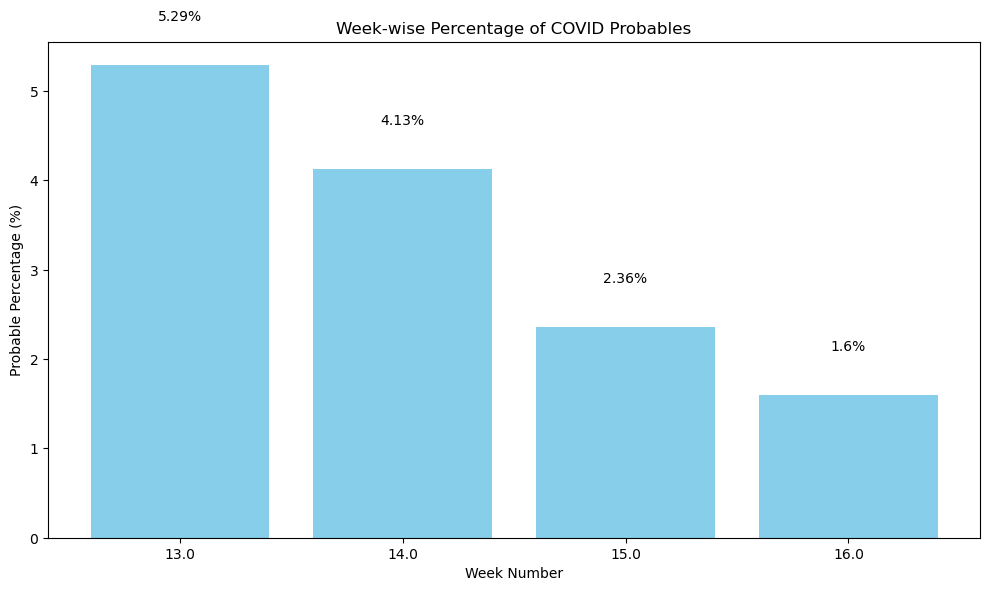

In [4]:
# Remove rows where week is 'NR'
df_clean = df[df['week'] != 'NR']

# Total persons submitted per week
weekly_total = (
    df_clean.groupby('week')
            .size()
            .reset_index(name='total_persons')
)

# Total probables (Y) per week
weekly_probables = (
    df_clean[df_clean['probable'].eq('y')]
    .groupby('week')
    .size()
    .reset_index(name='probable_count')
)

# Merge both
week_stats = weekly_total.merge(weekly_probables, on='week', how='left')

# Replace NaN (weeks with zero probables) with 0
week_stats['probable_count'] = week_stats['probable_count'].fillna(0).astype(int)

# Calculate percentage
week_stats['probable_percentage'] = (
    week_stats['probable_count'] / week_stats['total_persons'] * 100
).round(2)

print(week_stats)

plt.figure(figsize=(10, 6))

# Bar chart for probable percentage
plt.bar(week_stats['week'], week_stats['probable_percentage'], color='skyblue')

plt.title('Week-wise Percentage of COVID Probables')
plt.xlabel('Week Number')
plt.ylabel('Probable Percentage (%)')

# Add value labels on top of bars
for i, val in enumerate(week_stats['probable_percentage']):
    plt.text(week_stats['week'][i], val + 0.5, f"{val}%", ha='center')

plt.xticks(week_stats['week'])
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Week 13 shows the highest burden of probable COVID cases (5.29%), and although total participation drops sharply in later weeks, the probable‑case percentage also declines steadily to 1.60% by Week 16 — indicating early‑period transmission was significantly higher and required the greatest intervention focus.</em></strong></p>


## <b style="font-family: Cambria; font-size: 16px;"><i>2. How many participants in each FSA were marked as probable COVID cases (“y”), and what percentage do they represent within their respective FSA?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i> Resoning: Since geographic variation plays a major role in understanding disease spread, analyzing COVID probable cases at the FSA (Forward Sortation Area) level helps identify regional hotspots. Each FSA represents a specific community cluster, so comparing the number and percentage of probables across FSAs highlights which areas may have higher transmission risk or greater symptom reporting. This insight is valuable for targeted public‑health actions such as deploying mobile testing units, increasing community outreach, or prioritizing resources in high‑burden regions. By calculating both the total participants and the proportion marked as probable within each FSA, we gain a clearer picture of localized risk patterns and potential areas requiring closer monitoring.</i><b>

In [5]:


# Filter only probable cases
df_prob = df[df['probable'].eq('y')]

# Total persons per FSA
fsa_total = (
    df.groupby('fsa')
      .size()
      .reset_index(name='total_persons')
)

# Total probables per FSA
fsa_probables = (
    df_prob.groupby('fsa')
           .size()
           .reset_index(name='probable_count')
)

# Merge both
fsa_stats = fsa_total.merge(fsa_probables, on='fsa', how='left')

# Replace NaN (FSAs with zero probables) with 0
fsa_stats['probable_count'] = fsa_stats['probable_count'].fillna(0).astype(int)

# Calculate percentage
fsa_stats['probable_percentage'] = (
    fsa_stats['probable_count'] / fsa_stats['total_persons'] * 100
).round(2)
# Sort by probable percentage in descending order
fsa_stats_sorted = fsa_stats.sort_values(by='probable_percentage', ascending=False)

print(fsa_stats_sorted)



     fsa  total_persons  probable_count  probable_percentage
513  P8T             47               7                14.89
497  P4R             27               4                14.81
484  P2B             96              12                12.50
402  N4V             35               4                11.43
506  P7C            175              18                10.29
..   ...            ...             ...                  ...
56   K6K             24               0                 0.00
116  L1Y             77               0                 0.00
437  N7X             13               0                 0.00
41   K2R             31               0                 0.00
511  P7L             11               0                 0.00

[516 rows x 4 columns]


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
FSAs such as P8T, P4R, P2B, N4V, and P7C show the highest probable‑case percentages (10–15%), making them priority hotspots for targeted COVID interventions, enhanced testing, and community outreach, while FSAs with 0% probable cases require significantly lower immediate resource allocation.</em></strong></p>


## <b style="font-family: Cambria; font-size: 16px;"><i>3. How many participants in each FSA are classified as vulnerable, and what percentage do they represent within their respective FSA?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Understanding the distribution of vulnerable individuals across FSAs (Forward Sortation Areas) is essential for identifying regions with higher concentrations of at‑risk populations. Vulnerable individuals often require additional support such as medical assistance, wellness checks, or essential‑needs services. By calculating both the total number of participants and the proportion classified as vulnerable within each FSA, we can pinpoint areas where public‑health interventions may need to be prioritized. This geographic segmentation helps decision‑makers allocate resources more effectively, plan targeted outreach programs, and ensure that high‑risk communities receive timely support.</i><b>

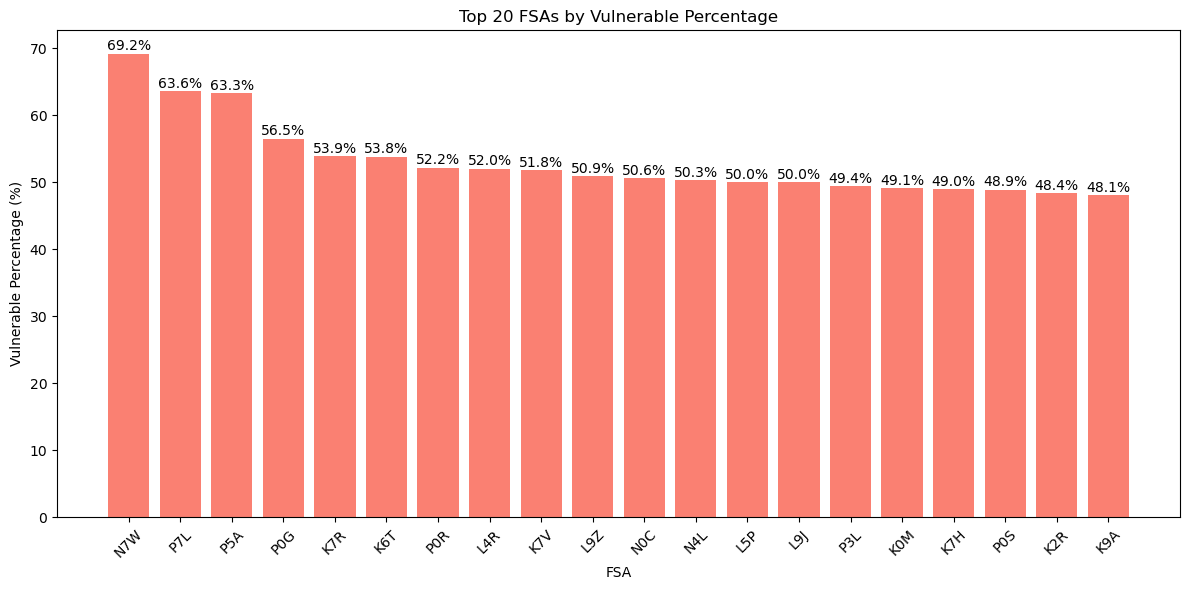

In [6]:


# Filter only vulnerable individuals
df_vul = df[df['vulnerable'].eq('y')]

# Remove FSAs that are 'NR'
df_clean = df[df['fsa'] != 'NR']

# Total persons per FSA
fsa_total = df_clean.groupby('fsa').size().reset_index(name='total_persons')

# Total vulnerables per FSA
fsa_vulnerables = df_vul.groupby('fsa').size().reset_index(name='vulnerable_count')

# Merge both
fsa_vul_stats = fsa_total.merge(fsa_vulnerables, on='fsa', how='left')
fsa_vul_stats['vulnerable_count'] = fsa_vul_stats['vulnerable_count'].fillna(0).astype(int)

# Calculate vulnerable percentage
fsa_vul_stats['vulnerable_percentage'] = (
    fsa_vul_stats['vulnerable_count'] / fsa_vul_stats['total_persons'] * 100
).round(1)

# Focus only on top 20 FSAs by vulnerable percentage
top_fsa = fsa_vul_stats.nlargest(20, 'vulnerable_percentage')

# Bar plot for top FSAs
plt.figure(figsize=(12, 6))
plt.bar(top_fsa['fsa'], top_fsa['vulnerable_percentage'], color='salmon')
plt.title('Top 20 FSAs by Vulnerable Percentage')
plt.xlabel('FSA')
plt.ylabel('Vulnerable Percentage (%)')

# Add labels on bars
for i, val in enumerate(top_fsa['vulnerable_percentage']):
    plt.text(i, val + 0.5, f"{val}%", ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
FSAs such as N7W, P7L, P5A, and P0G show the highest concentrations of vulnerable individuals (over 55%), indicating these regions should be prioritized for public-health interventions, support services, and resource allocation to protect high-risk populations.</em></strong></p>

## <b style="font-family: Cambria; font-size: 16px;"><i>4. How many participants in each age category (<26, 26–44, 45–64, >65) were marked as probable COVID cases (“y”), and what percentage do they represent within each age group?</i><b>

## <b style="font-family: Cambria; font-size: 16px;">Reasoning: Age is a key factor influencing COVID‑19 susceptibility and severity. Although the dataset does not contain exact ages, the predefined age categories (<26, 26–44, 45–64, >65) still allow meaningful segmentation of the population. By calculating the number and percentage of probable COVID cases within each age category, we can identify which groups show higher symptom reporting or potential exposure. This helps determine whether older adults (>65) are disproportionately represented among probables or whether younger groups contribute more to transmission. Such insights support targeted public‑health planning, resource allocation, and risk‑communication strategies tailored to specific age segments.<b>

  age_category  total_persons  probable_count  probable_percentage
0        26-44          12086             206                  1.7
1        45-64          11771             132                  1.1
2          <26           3235              74                  2.3
3          >65           3374              26                  0.8


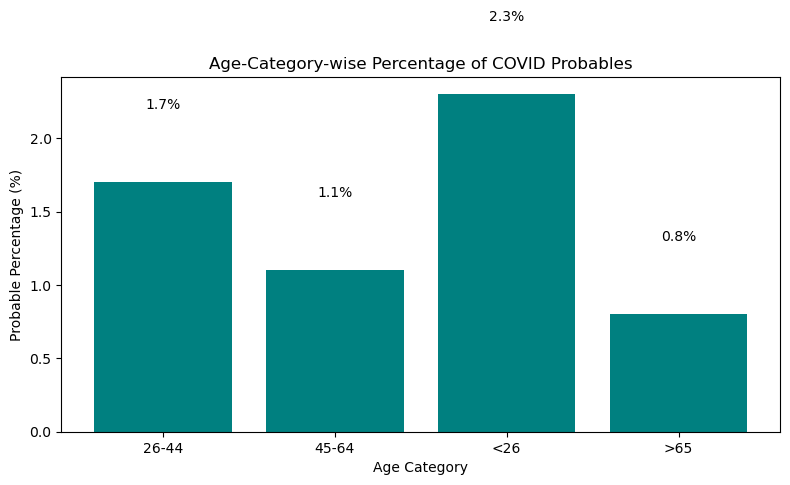

In [7]:
# Filter out NR age categories
df_clean = df[df['age_category'] != 'NR']

# Total persons per age category
age_total = (
    df_clean.groupby('age_category')
      .size()
      .reset_index(name='total_persons')
)

# Total probables per age category
age_probables = (
    df_clean[df_clean['probable'].eq('y')]
    .groupby('age_category')
    .size()
    .reset_index(name='probable_count')
)

# Merge both
age_stats = age_total.merge(age_probables, on='age_category', how='left')

# Replace NaN (categories with zero probables) with 0
age_stats['probable_count'] = age_stats['probable_count'].fillna(0).astype(int)

# Calculate percentage
age_stats['probable_percentage'] = (
    age_stats['probable_count'] / age_stats['total_persons'] * 100
).round(1)

print(age_stats)

plt.figure(figsize=(8, 5))
plt.bar(age_stats['age_category'], age_stats['probable_percentage'], color='teal')

plt.title('Age-Category-wise Percentage of COVID Probables')
plt.xlabel('Age Category')
plt.ylabel('Probable Percentage (%)')

# Add labels on bars
for i, val in enumerate(age_stats['probable_percentage']):
    plt.text(i, val + 0.5, f"{val}%", ha='center')

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Participants under age 26 show the highest probable COVID rate (2.3%), followed by the 26–44 group (1.7%), indicating that younger age groups may be driving transmission and should be prioritized for targeted outreach, testing, and prevention strategies.</em></strong></p>


## <b style="font-family: Cambria; font-size: 16px;"><i>5. What are the most commonly reported needs among participants, and what percentage does each need category represent after cleaning and standardizing the “needs” column?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: The needs column provides insight into the types of assistance participants require, which is essential for planning and delivering community support services. Because participants may enter needs in different formats or with varying terminology, cleaning and standardizing the column ensures that similar needs are grouped together. Once cleaned, analyzing the frequency and percentage of each need category helps identify the most common support requirements. For example, a high proportion of food‑related needs may indicate food insecurity, while frequent requests for medication or transportation may highlight barriers to healthcare access. Understanding these patterns allows organizations to allocate resources effectively and tailor interventions to the community’s most urgent needs.</i><b>

               need  count  percentage
0    noneoftheabove   9217        40.7
1  emotionalsupport   4358        19.3
2  financialsupport   3646        16.1
3             other   2601        11.5
4              food   2404        10.6
5          medicine    409         1.8


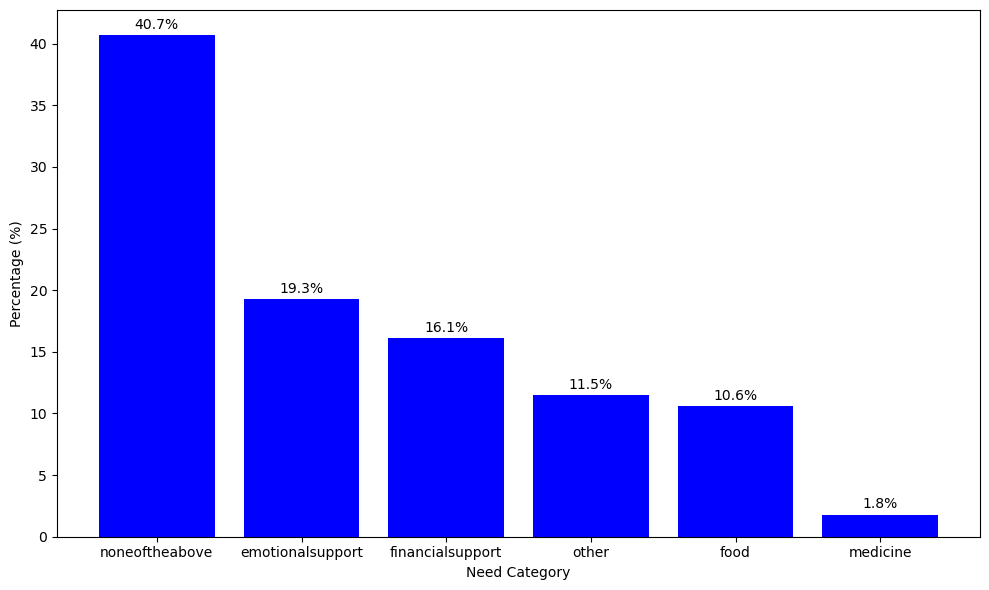

In [8]:


## Step 1: Clean the needs column
df['needs_clean'] = df['needs'].str.lower().str.strip()

# Step 2: Remove 'NR' or missing values and make a copy
df_clean = df.loc[df['needs_clean'].notna() & (df['needs_clean'] != 'nr')].copy()

# Step 3: Standardize common variations using .loc
needs_mapping = {
    'food': 'food',
    'groceries': 'food',
    'grocery': 'food',
    'medication': 'medicine',
    'medications': 'medicine',
    'meds': 'medicine',
    'transport': 'transportation',
    'transportation': 'transportation',
    'ride': 'transportation'
}

df_clean.loc[:, 'needs_clean'] = df_clean['needs_clean'].replace(needs_mapping)

# Step 4: Calculate needs-based statistics
needs_stats = df_clean['needs_clean'].value_counts().reset_index()
needs_stats.columns = ['need', 'count']

# Step 5: Add percentage
total = len(df_clean)
needs_stats['percentage'] = (needs_stats['count'] / total * 100).round(1)

print(needs_stats)

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.bar(needs_stats['need'], needs_stats['percentage'], color='blue')

#plt.title('Needs-Based Percentage Distribution (NR Removed)')
plt.xlabel('Need Category')
plt.ylabel('Percentage (%)')

# Add labels on bars
for i, val in enumerate(needs_stats['percentage']):
    plt.text(i, val + 0.5, f"{val}%", ha='center')

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Since emotional support, financial support, and food assistance make up the majority of reported needs (over 46% combined), community interventions should prioritize mental‑health outreach, financial aid programs, and food‑security services, as these represent the most urgent and widespread support requirements among participants.</em></strong></p>

###### <p style="font-family: Cambria; font-size: 16px;"><i><b>6. Which Forward Sortation Areas (FSAs) should be prioritized for COVID‑19 intervention based on positivity rates, total case volume, and the proportion of vulnerable individuals?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: The central question—which FSAs should be prioritized for COVID‑19 intervention based on positivity rates, case volume, and the proportion of vulnerable individuals—is designed to move the analysis beyond simple case reporting toward actionable public‑health decision‑making. By integrating multiple indicators of risk, the question supports a more comprehensive understanding of where interventions will have the greatest impact. Positivity rate highlights areas with active transmission, total case volume reflects the scale of potential exposure within each community, and the vulnerability indicator identifies populations at higher risk of severe outcomes. Considering these factors together enables a more equitable and efficient allocation of limited resources such as testing, outreach, and isolation support. This approach ensures that the analysis not only describes the current situation but also provides a structured, data‑driven basis for prioritizing interventions in the regions where they are most urgently needed.


CHECK VALUES:
    fsa  total_cases  positive_cases  vulnerable_count  positivity_rate  \
0   K0A         2295               0               852         0.000000   
1   K0B          200               0                94         0.000000   
2   K0C          914               0               429         0.000000   
3   K0E          614               0               258         0.000000   
4   K0G          841               0               385         0.000000   
5   K0H          646               0               308         0.000000   
6   K0J          477               0               225         0.000000   
7   K0K         1982               0               877         0.000000   
8   K0L         1023               0               482         0.000000   
9   K0M          756               0               371         0.000000   
10  K1A           73               0                29         0.000000   
11  K1B          370               0               136         0.000000   
12  K1C   

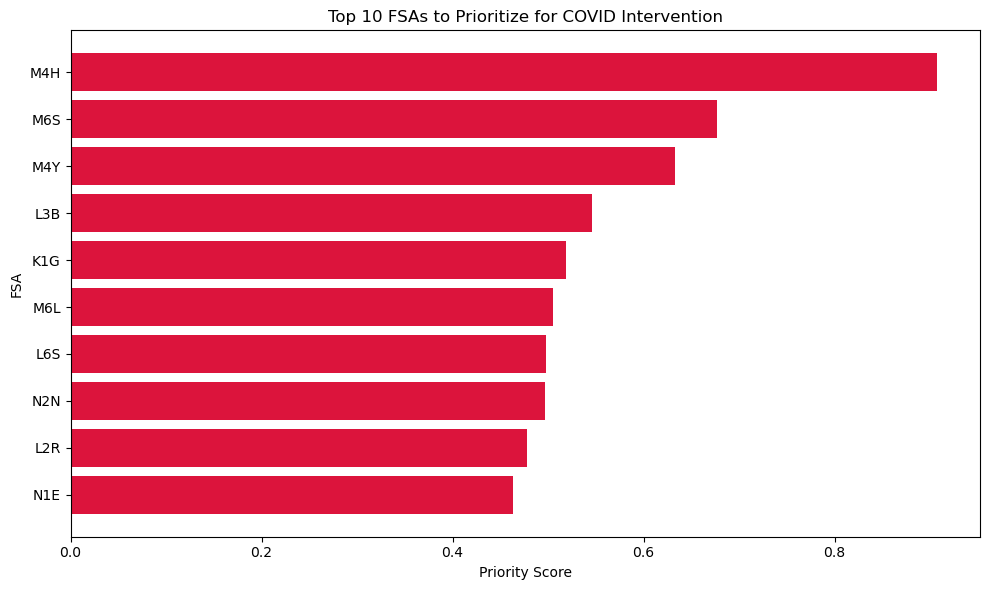

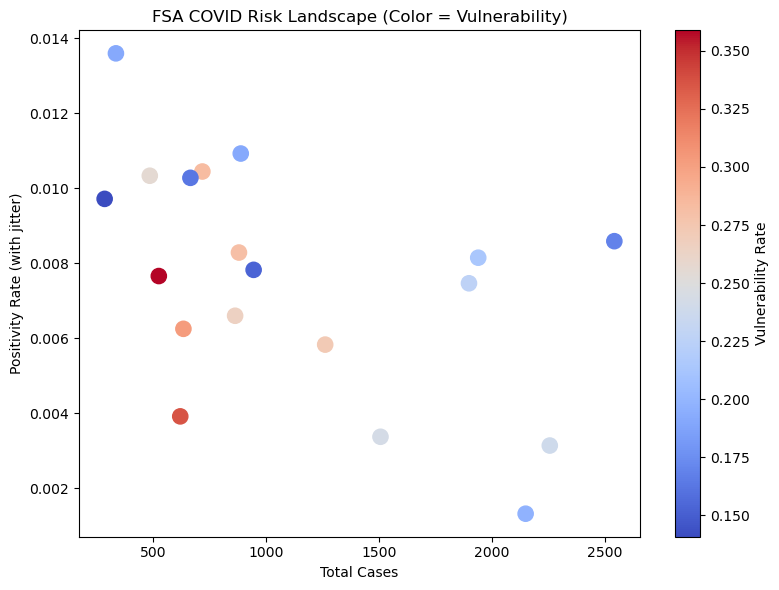

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Fix covid_positive_flag FIRST
# -----------------------------
df['covid_positive_flag'] = df['covid_positive'].astype(str).str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', '1', 'positive', 'positively'] else 0
)

# Vulnerable flag
df['vulnerable_flag'] = df['vulnerable'].astype(str).str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', '1'] else 0
)

# -----------------------------
# Step 2: Group by FSA and calculate metrics
# -----------------------------
fsa_summary = (
    df.groupby('fsa')
      .agg(
          total_cases=('covid_positive_flag', 'count'),
          positive_cases=('covid_positive_flag', 'sum'),
          vulnerable_count=('vulnerable_flag', 'sum')
      )
      .reset_index()
)

# Compute rates
fsa_summary['positivity_rate'] = (
    fsa_summary['positive_cases'] / fsa_summary['total_cases']
)

fsa_summary['vulnerability_rate'] = (
    fsa_summary['vulnerable_count'] / fsa_summary['total_cases']
)

print("\nCHECK VALUES:")
print(fsa_summary.head(20))

# -----------------------------
# Step 3: Filter FSAs
# -----------------------------
fsa_summary = fsa_summary[fsa_summary['total_cases'] >= 20]
fsa_summary = fsa_summary[fsa_summary['positive_cases'] > 0]

print("\nAfter filtering:")
print(fsa_summary.head())

# -----------------------------
# Step 4: Normalize metrics
# -----------------------------
fsa_summary['norm_positive'] = (
    fsa_summary['positive_cases'] / fsa_summary['positive_cases'].max()
)

fsa_summary['norm_rate'] = (
    fsa_summary['positivity_rate'] / fsa_summary['positivity_rate'].max()
)

fsa_summary['norm_vulnerable'] = (
    fsa_summary['vulnerability_rate'] / fsa_summary['vulnerability_rate'].max()
)

# Priority score
fsa_summary['priority_score'] = (
    0.5 * fsa_summary['norm_positive'] +
    0.3 * fsa_summary['norm_rate'] +
    0.2 * fsa_summary['norm_vulnerable']
)



# -----------------------------
# Step 6: Top 10 FSAs
# -----------------------------
top_fsa = fsa_summary.sort_values('priority_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_fsa['fsa'], top_fsa['priority_score'], color='crimson')
plt.xlabel('Priority Score')
plt.ylabel('FSA')
plt.title('Top 10 FSAs to Prioritize for COVID Intervention')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -----------------------------
# Step 7: Scatter Plot with Jitter
# -----------------------------
fsa_summary['positivity_rate_jitter'] = (
    fsa_summary['positivity_rate'] + np.random.uniform(0, 0.01, len(fsa_summary))
)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    fsa_summary['total_cases'],
    fsa_summary['positivity_rate_jitter'],
    c=fsa_summary['vulnerability_rate'],
    cmap='coolwarm',
    s=120
)

plt.colorbar(scatter, label='Vulnerability Rate')
plt.xlabel('Total Cases')
plt.ylabel('Positivity Rate (with jitter)')
plt.title('FSA COVID Risk Landscape (Color = Vulnerability)')
plt.tight_layout()
plt.show()




<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The comparison between the COVID‑only priority model and the enhanced model incorporating vulnerability demonstrates how integrating social‑risk factors leads to a more equitable and actionable assessment of community‑level COVID‑19 risk. While both models consistently identify FSAs such as M4H, M6S, and M4Y as high‑priority areas due to their non‑zero positivity and large case volumes, the inclusion of vulnerability meaningfully reshapes the ranking by elevating FSAs with high proportions of at‑risk individuals, such as L3B, K1G, L6S, L2R, and N1E. These areas may not exhibit high positivity today, but their elevated vulnerability rates indicate a greater likelihood of severe outcomes if transmission increases. As a result, the enhanced model provides a more comprehensive and socially informed basis for intervention planning, ensuring that limited public‑health resources are directed not only toward areas with active transmission but also toward communities with heightened susceptibility to harm.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>7. Which age groups should be prioritized for COVID-related interventions based on risk, infection rates, and comorbidity burden?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: COVID affects age groups differently. Older adults, especially those 65+, experience higher rates of severe complications and have a greater prevalence of comorbidities such as hypertension, diabetes, and heart disease. To allocate resources efficiently, we can compute a composite risk score that combines COVID positivity rates, average comorbidity counts, and, if available, hospitalization or severity indicators. This method ensures interventions target age groups with the highest combined risk, while also identifying younger adults with significant comorbidities who may require attention even if their overall case counts are moderate.


Age Group Risk Summary:

  age_category  risk_score  positivity_rate  avg_comorbidities
2          <26       0.592            0.001              0.132
1        45-64       0.547            0.001              0.390
3          >65       0.500            0.000              0.717
0        26-44       0.462            0.001              0.182


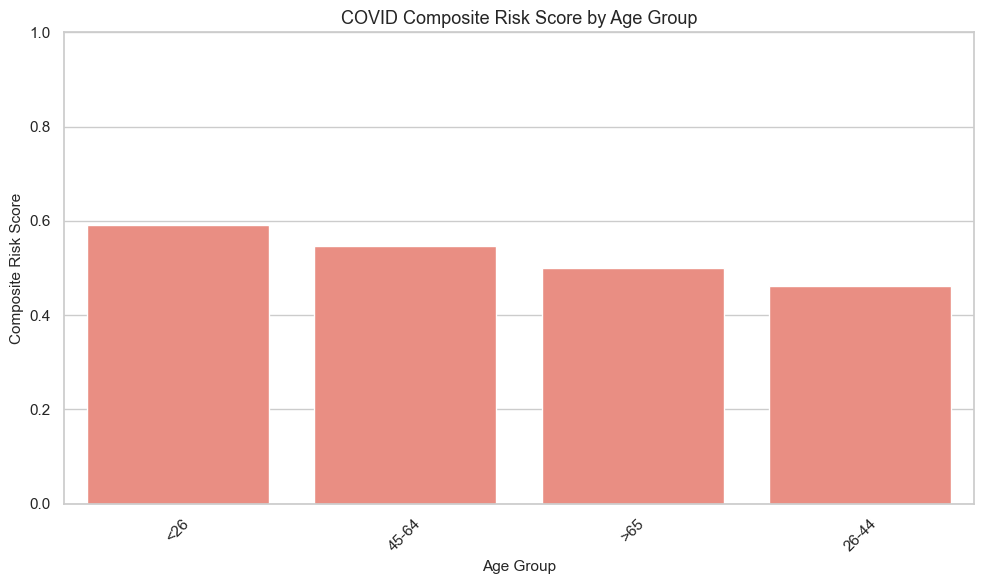

In [10]:
# ---------------------------------------------------
# Step 1: Remove rows with NR in age_category
# ---------------------------------------------------
df_age_clean = df.loc[df['age_category'] != 'NR'].copy()

# ---------------------------------------------------
# Step 2: Derive comorbidities_count from `conditions`
# ---------------------------------------------------
def count_comorbidities(val):
    if pd.isna(val) or val in ['NR', 'na', '']:
        return 0
    return len([c for c in val.split(';') if c.strip().lower() != 'nr'])

df_age_clean.loc[:, 'comorbidities_count'] = df_age_clean['conditions'].apply(count_comorbidities)

# ---------------------------------------------------
# Step 3: Compute age-group summary
# ---------------------------------------------------
age_summary = (
    df_age_clean
    .groupby('age_category', observed=False)
    .agg(
        total_cases=('covid_positive_flag', 'count'),
        positive_cases=('covid_positive_flag', 'sum'),
        avg_comorbidities=('comorbidities_count', 'mean')
    )
    .reset_index()
)

# ---------------------------------------------------
# Step 4: Compute positivity rate
# ---------------------------------------------------
age_summary['positivity_rate'] = (
    age_summary['positive_cases'] / age_summary['total_cases']
)

# ---------------------------------------------------
# Step 5: Normalize & compute composite risk score
# ---------------------------------------------------
age_summary['norm_positivity'] = (
    age_summary['positivity_rate'] / age_summary['positivity_rate'].max()
)

age_summary['norm_comorbidity'] = (
    age_summary['avg_comorbidities'] / age_summary['avg_comorbidities'].max()
)

age_summary['risk_score'] = (
    0.5 * age_summary['norm_positivity'] +
    0.5 * age_summary['norm_comorbidity']
)

# ---------------------------------------------------
# Step 6: Rank age groups
# ---------------------------------------------------
age_summary = age_summary.sort_values('risk_score', ascending=False)

# ---------------------------------------------------
# Step 7: Print results
# ---------------------------------------------------
print("\nAge Group Risk Summary:\n")
print(
    age_summary[
        ['age_category', 'risk_score', 'positivity_rate', 'avg_comorbidities']
    ].round(3)
)

# ---------------------------------------------------
# Step 8: Visualization
# ---------------------------------------------------
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(
    x='age_category',
    y='risk_score',
    data=age_summary,
    color='salmon'
)

plt.title('COVID Composite Risk Score by Age Group', fontsize=13)
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Composite Risk Score', fontsize=11)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
By combining COVID positivity rates with comorbidity burden into a composite risk score, the analysis reveals that risk varies significantly across age groups and regions. Younger adults show higher exposure-driven risk, middle-aged adults exhibit elevated risk due to comorbidities, and older adults remain medically vulnerable despite lower observed positivity. These insights support focused allocation of testing, prevention, and support resources, enabling data-driven, high-impact public health decision-making.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>8. Which types of support or services should be prioritized for COVID-affected individuals based on reported needs, and how can resources be allocated efficiently across different patient segments?</i>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Not all patients report the same needs during a COVID episode. Some require medical support, others need mental health assistance, financial aid, or social services. By analyzing the cleaned ‘Needs’ column, we can group patients into categories such as medical, psychosocial, and financial, quantify the frequency and intensity of each need across demographics like age, comorbidity burden, or geographic location (FSA), and compute a priority score for each category weighted by risk indicators such as COVID positivity, comorbidities, or severity. This approach enables targeted interventions, ensuring that high-risk individuals with critical needs are served first, while optimizing resource allocation across lower-risk groups.


Needs-Based Prescriptive Priority Summary:
  needs_category  avg_priority  patient_count
2        Medical      0.046455            409
4          Other      0.022513           2601
0    Basic Needs      0.021492           2404
1      Financial      0.016974           3646
5   Psychosocial      0.014035           4358
3        Minimal      0.001047         280687


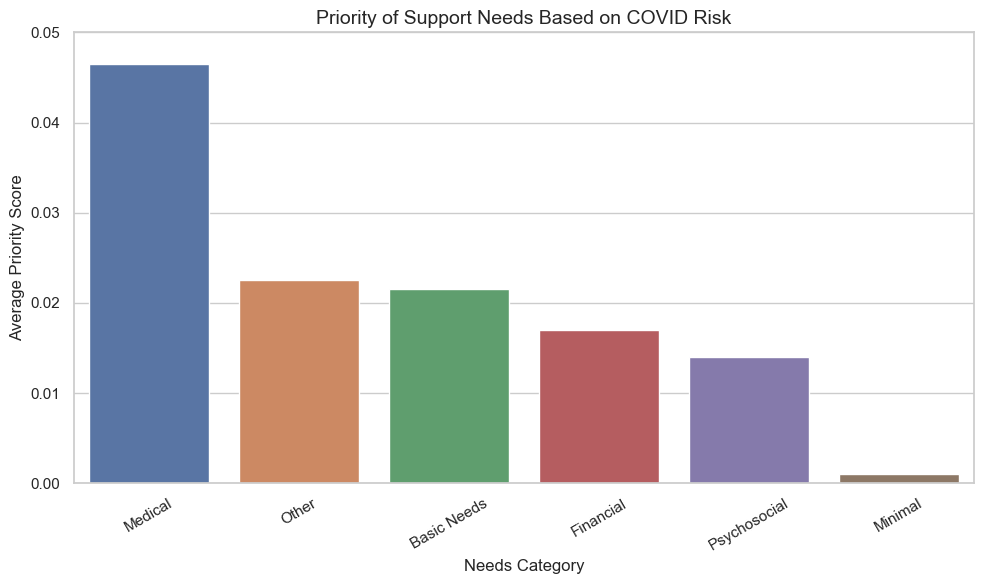

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# STEP 1: Map Needs to Categories
# ================================
needs_mapping = {
    'emotionalSupport': 'Psychosocial',
    'financialSupport': 'Financial',
    'food': 'Basic Needs',
    'medication': 'Medical',
    'other': 'Other',
    'noneOfTheAbove': 'Minimal',
    'NR': 'Minimal'
}

def map_needs(value):
    if pd.isna(value):
        return 'Minimal'
    return needs_mapping.get(value, 'Minimal')

df['needs_category'] = df['needs'].apply(map_needs)

# =====================================
# STEP 2: Derive Comorbidities Count
# =====================================
def count_comorbidities(val):
    if pd.isna(val) or val in ['NR', 'na', '']:
        return 0
    return len([c for c in val.split(';') if c.strip().lower() != 'nr'])

df['comorbidities_count'] = df['conditions'].apply(count_comorbidities)

# =====================================
# STEP 3: Normalize Risk Factors
# =====================================
df['covid_risk_norm'] = (
    df['covid_positive_flag'] / df['covid_positive_flag'].max()
)

df['comorbidity_risk_norm'] = (
    df['comorbidities_count'] / df['comorbidities_count'].max()
)

# =====================================
# STEP 4: Composite Priority Score
# =====================================
# 50% COVID risk + 50% comorbidity burden
df['priority_score'] = (
    0.5 * df['covid_risk_norm'] +
    0.5 * df['comorbidity_risk_norm']
)

# =====================================
# STEP 5: Aggregate by Needs Category
# =====================================
needs_priority = (
    df.groupby('needs_category', observed=True)
      .agg(
          avg_priority=('priority_score', 'mean'),
          patient_count=('priority_score', 'count')
      )
      .reset_index()
      .sort_values('avg_priority', ascending=False)
)

print("\nNeeds-Based Prescriptive Priority Summary:")
print(needs_priority)

# =====================================
# STEP 6: Visualization
# =====================================
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(
    x='needs_category',
    y='avg_priority',
    data=needs_priority,
    hue='needs_category',
    dodge=False,
    legend=False
)

plt.title('Priority of Support Needs Based on COVID Risk', fontsize=14)
plt.xlabel('Needs Category')
plt.ylabel('Average Priority Score')
plt.ylim(0, 0.05)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The needs‑based analysis shows that Medical needs carry the highest priority despite a smaller population, indicating a concentrated group requiring urgent, high‑touch support. Other, Basic Needs, and Financial categories show moderate priority with larger populations, suggesting broader but less acute service demands. Psychosocial needs present lower average priority but still represent a meaningful segment for preventive outreach. The Minimal group, which accounts for the majority of respondents, shows negligible priority and does not require targeted intervention. Overall, resources should be directed first toward individuals with Medical needs, while scalable support programs should address Basic, Financial, and Other needs, complemented by ongoing monitoring of Psychosocial cases.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>9. Which combinations of geographic areas (FSA), age groups, and patient needs should be prioritized to maximize the impact of COVID-related interventions?</i>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Not all FSAs or age groups are affected by COVID in the same way, and patients’ needs vary widely. Some neighborhoods may have many older adults requiring medical or psychosocial support, while others may have younger populations with mental health or financial assistance needs. By combining FSA, age, and needs, we can calculate a composite priority score that accounts for COVID positivity rates, comorbidity burden, severity or risk indicators, and the frequency and type of reported needs. This approach enables public health teams to allocate resources efficiently, targeting high-risk areas and high-impact patient groups rather than distributing interventions uniformly.


 Valid needs categories:
['emotionalsupport' 'financialsupport' 'food' 'medication']

 First 10 grouped rows:
   fsa age_category       needs_clean  patient_count  positive_cases  \
0  K0A        26-44  emotionalsupport             21               0   
1  K0A        26-44  financialsupport              6               0   
2  K0A        26-44              food             10               0   
3  K0A        26-44        medication              1               0   
4  K0A        45-64  emotionalsupport             13               0   
5  K0A        45-64  financialsupport              6               0   
6  K0A        45-64              food             22               0   
7  K0A        45-64        medication              1               0   
8  K0A          <26  emotionalsupport              3               0   
9  K0A          <26  financialsupport              3               0   

   avg_comorbidities  vulnerable_count  positivity_rate  vulnerability_rate  
0           0.1904

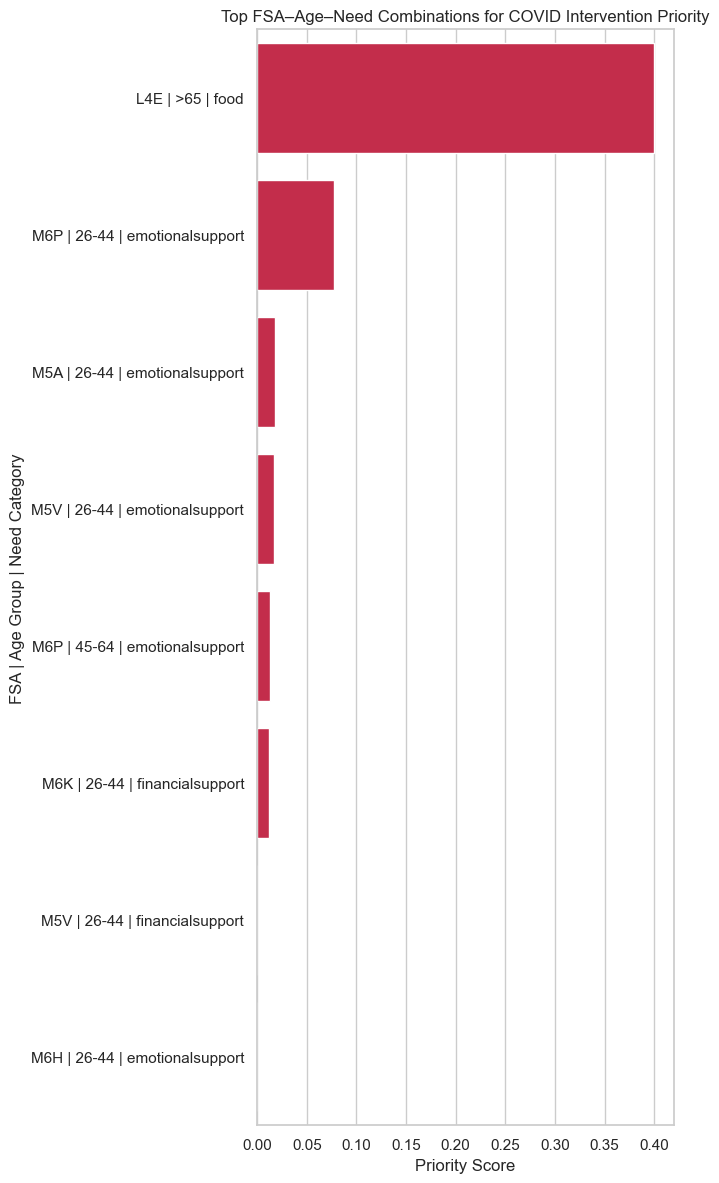

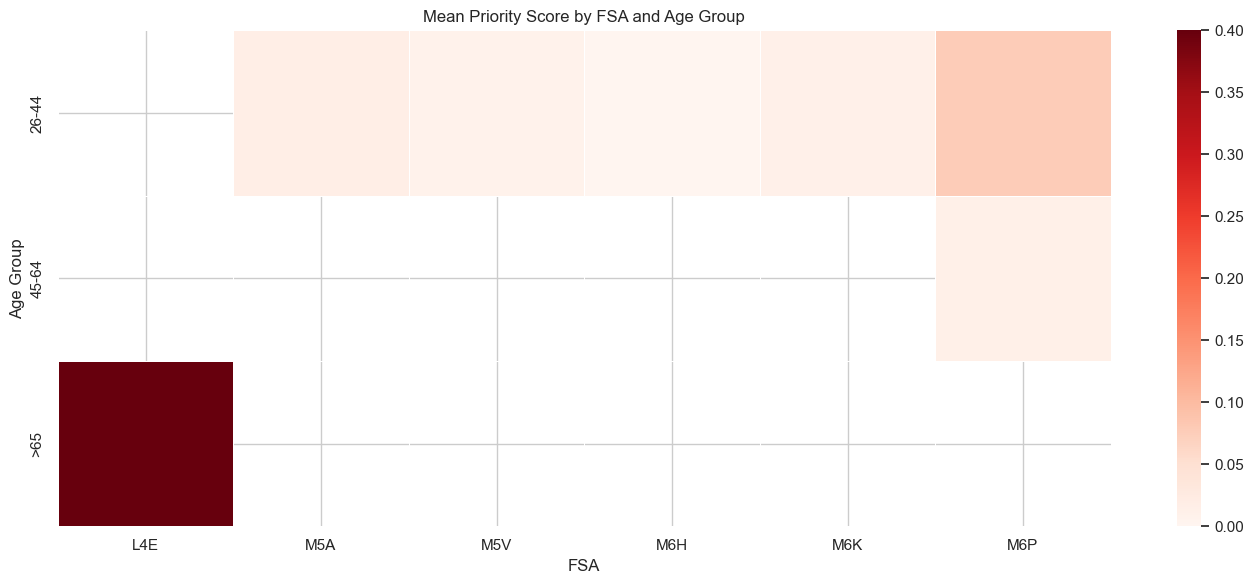

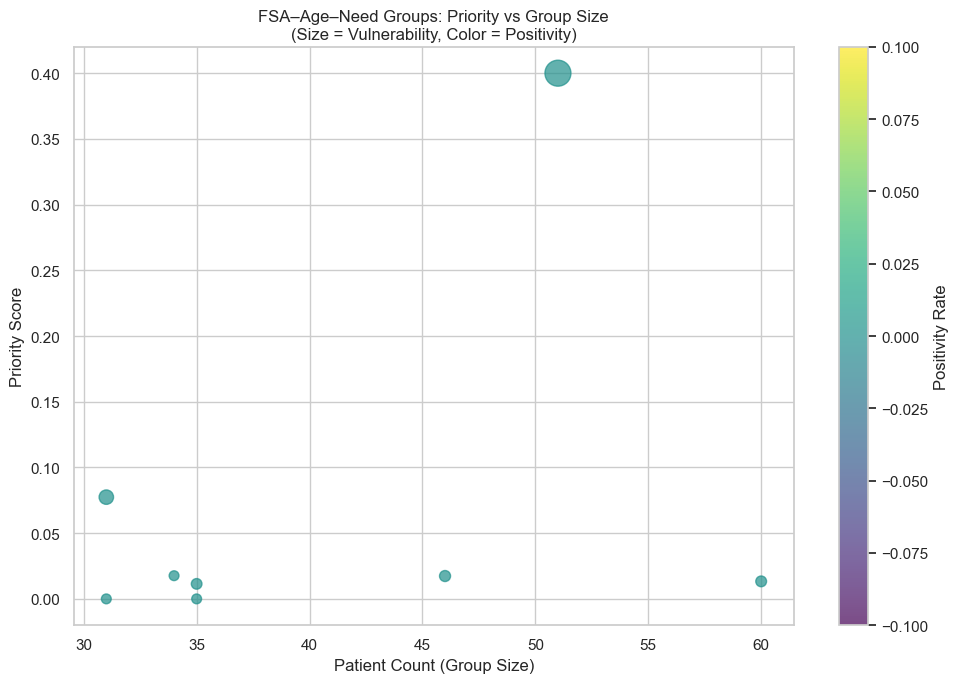

In [12]:
sns.set(style="whitegrid")

# ---------------------------------------------------------
# STEP 0 — CLEANING & FLAG CREATION
# ---------------------------------------------------------

# COVID positive flag
df['covid_positive_flag'] = df['covid_positive'].str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', 'positive', '1'] else 0
)

# Vulnerable flag
df['vulnerable_flag'] = df['vulnerable'].str.lower().apply(
    lambda x: 1 if x in ['y', 'yes', '1'] else 0
)

# Comorbidity count
def count_comorbidities(x):
    if pd.isna(x):
        return 0
    x = str(x).strip().lower()
    if x in ["not reported", "none", "nr", "no", ""]:
        return 0
    return len([c for c in x.split(',') if c.strip() != ""])

df['comorbidities_count'] = df['conditions'].apply(count_comorbidities)

# Clean needs column and exclude invalid values
invalid_needs = ["nr", "noneoftheabove", "other", "none", "not reported"]
df['needs_clean'] = df['needs'].str.lower().str.strip()
df = df[~df['needs_clean'].isin(invalid_needs)]

print("\n Valid needs categories:")
print(df['needs_clean'].unique())


# ---------------------------------------------------------
# STEP 1 — GROUP BY FSA × AGE × NEEDS
# ---------------------------------------------------------

group_cols = ['fsa', 'age_category', 'needs_clean']

group_summary = (
    df.groupby(group_cols)
      .agg(
          patient_count=('covid_positive_flag', 'count'),
          positive_cases=('covid_positive_flag', 'sum'),
          avg_comorbidities=('comorbidities_count', 'mean'),
          vulnerable_count=('vulnerable_flag', 'sum')
      )
      .reset_index()
)

# Rates
group_summary['positivity_rate'] = (
    group_summary['positive_cases'] / group_summary['patient_count']
).fillna(0)

group_summary['vulnerability_rate'] = (
    group_summary['vulnerable_count'] / group_summary['patient_count']
).fillna(0)

print("\n First 10 grouped rows:")
print(group_summary.head(10))


# ---------------------------------------------------------
# STEP 2 — FILTER OUT SMALL GROUPS
# ---------------------------------------------------------

min_group_size = 30
group_summary = group_summary[group_summary['patient_count'] >= min_group_size]

print(f"\n Groups with ≥ {min_group_size} patients:", len(group_summary))


# ---------------------------------------------------------
# STEP 3 — NORMALIZATION
# ---------------------------------------------------------

def safe_norm(series):
    return series / series.max() if series.max() > 0 else 0

group_summary['norm_positive_cases'] = safe_norm(group_summary['positive_cases'])
group_summary['norm_positivity_rate'] = safe_norm(group_summary['positivity_rate'])
group_summary['norm_comorbidities'] = safe_norm(group_summary['avg_comorbidities'])
group_summary['norm_vulnerability'] = safe_norm(group_summary['vulnerability_rate'])


# ---------------------------------------------------------
# STEP 4 — PRIORITY SCORE
# ---------------------------------------------------------

w_positive_cases = 0.35
w_positivity_rate = 0.25
w_comorbidities = 0.20
w_vulnerability = 0.20

group_summary['priority_score'] = (
    w_positive_cases * group_summary['norm_positive_cases'] +
    w_positivity_rate * group_summary['norm_positivity_rate'] +
    w_comorbidities * group_summary['norm_comorbidities'] +
    w_vulnerability * group_summary['norm_vulnerability']
)


# ---------------------------------------------------------
# STEP 5 — TOP PRIORITY COMBINATIONS
# ---------------------------------------------------------

top_n = 15
top_groups = group_summary.sort_values('priority_score', ascending=False).head(top_n)

print(f"\n Top {top_n} FSA–Age–Needs combinations:")
print(top_groups[[
    'fsa', 'age_category', 'needs_clean',
    'priority_score', 'patient_count',
    'positive_cases', 'positivity_rate',
    'avg_comorbidities', 'vulnerability_rate'
]])
import plotly.graph_objects as go

# Prepare labels
fsa_labels = group_summary['fsa'].unique().tolist()
age_labels = group_summary['age_category'].unique().tolist()
need_labels = group_summary['needs_clean'].unique().tolist()

labels = fsa_labels + age_labels + need_labels

# Index mapping
label_index = {label: i for i, label in enumerate(labels)}

# Build source–target–value lists
sources = []
targets = []
values = []

for _, row in group_summary.iterrows():
    fsa = row['fsa']
    age = row['age_category']
    need = row['needs_clean']
    score = row['priority_score']

    # FSA → Age
    sources.append(label_index[fsa])
    targets.append(label_index[age])
    values.append(score)

    # Age → Need
    sources.append(label_index[age])
    targets.append(label_index[need])
    values.append(score)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="rgba(200, 50, 50, 0.8)"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(150, 150, 150, 0.4)"
    )
)])

fig.update_layout(
    title_text="Sankey Diagram: FSA → Age → Needs (Weighted by Priority Score)",
    font_size=12
)

fig.show()



# ---------------------------------------------------------
# STEP 6 — VISUALIZATION 1: BAR CHART OF TOP GROUPS
# ---------------------------------------------------------

top_groups['combo_label'] = (
    top_groups['fsa'] + " | " +
    top_groups['age_category'] + " | " +
    top_groups['needs_clean']
)

plt.figure(figsize=(7, 12))
sns.barplot(
    data=top_groups,
    x='priority_score',
    y='combo_label',
    color='crimson'
)
plt.xlabel('Priority Score')
plt.ylabel('FSA | Age Group | Need Category')
plt.title('Top FSA–Age–Need Combinations for COVID Intervention Priority')
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# STEP 7 — VISUALIZATION 2: HEATMAP (FSA × AGE)
# ---------------------------------------------------------

fsa_age_summary = (
    group_summary.groupby(['fsa', 'age_category'])
    .agg(mean_priority=('priority_score', 'mean'))
    .reset_index()
)

heatmap_data = fsa_age_summary.pivot(
    index='age_category',
    columns='fsa',
    values='mean_priority'
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=0.5
)
plt.title('Mean Priority Score by FSA and Age Group')
plt.xlabel('FSA')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# STEP 8 — VISUALIZATION 3: SCATTER PLOT
# ---------------------------------------------------------

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    group_summary['patient_count'],
    group_summary['priority_score'],
    c=group_summary['positivity_rate'],
    s=50 + 300 * group_summary['vulnerability_rate'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Positivity Rate')
plt.xlabel('Patient Count (Group Size)')
plt.ylabel('Priority Score')
plt.title('FSA–Age–Need Groups: Priority vs Group Size\n(Size = Vulnerability, Color = Positivity)')
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
The analysis identifies a small set of FSA–age–needs groups that warrant focused attention, with the highest priority seen in older adults (>65) in FSA L4E requiring food support, driven by the highest comorbidity and vulnerability levels. Several mid‑priority groups emerge among working‑age adults (26–44 and 45–64) in FSAs M6P, M5A, M5V, and M6H, primarily linked to emotional‑support needs, reflecting psychosocial strain despite low COVID positivity. Financial‑support needs appear but with lower vulnerability indicators. Overall, interventions should prioritize L4E older adults, followed by targeted psychosocial outreach for emotionally distressed adults in the identified FSAs, while maintaining routine monitoring of lower‑risk groups.</em></strong></p>

## <b style="font-family: Cambria; font-size: 16px;"><i> 10. Which patient groups (based on demographics, comorbidities, and symptoms) should be prioritized for COVID-related interventions to reduce risk and improve outcomes?</i><b>

## <b style="font-family: Cambria; font-size: 16px;"><i> Reasoning:Not all patients are equally vulnerable to COVID. Certain marker groups, defined by combinations of age, comorbidities, and reported needs, carry higher risk of severe infection or complications. By analyzing the dataset, we can identify high-risk age groups, FSAs, or comorbidity clusters, while also considering severity of symptoms, positivity rates, or hospitalization likelihood. Combining these factors into a composite risk score allows public health teams to target interventions such as testing, vaccination, or social support effectively. This approach mirrors clinical prioritization—just as high-risk GDM patients are monitored closely, high-risk COVID marker groups receive focused attention.</i><b>

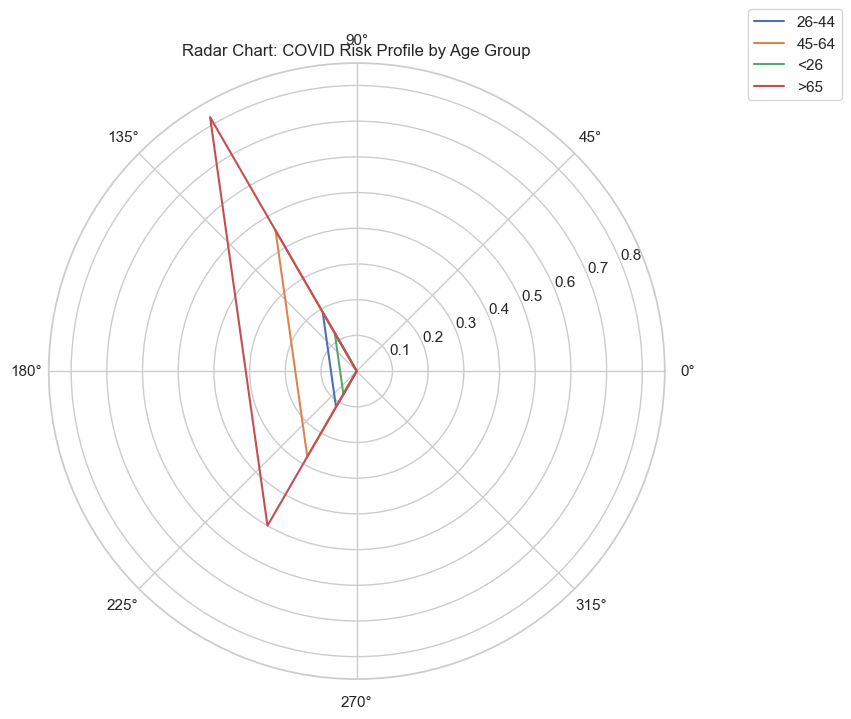

In [13]:


import seaborn as sns
import matplotlib.pyplot as plt

# Remove NR
df_clean = df[df['age_category'] != 'NR'].copy()

# Count comorbidities
df_clean['comorbidities_count'] = df_clean['conditions'].apply(
    lambda x: 0 if pd.isna(x) or x in ['NR', 'na', ''] 
    else len([c for c in str(x).split(';') if c.strip()])
)

# Aggregate by age
age_summary = df_clean.groupby('age_category').agg(
    total_cases=('covid_positive_flag', 'count'),
    positive_cases=('covid_positive_flag', 'sum'),
    avg_comorbidities=('comorbidities_count', 'mean')
).reset_index()

# Calculate positivity rate
age_summary['positivity_rate'] = (
    age_summary['positive_cases'] / age_summary['total_cases']
)

# Avoid division by zero
pos_max = age_summary['positivity_rate'].max()
comorb_max = age_summary['avg_comorbidities'].max()

if pos_max == 0:
    pos_max = 1

if comorb_max == 0:
    comorb_max = 1

# Risk score
age_summary['risk_score'] = (
    0.5 * (age_summary['positivity_rate'] / pos_max) +
    0.5 * (age_summary['avg_comorbidities'] / comorb_max)
)



labels = ['Positivity Rate', 'Avg Comorbidities', 'Risk Score']
num_vars = len(labels)

plt.figure(figsize=(8,8))

for i, row in age_summary.iterrows():
    values = [
        row['positivity_rate'],
        row['avg_comorbidities'],
        row['risk_score']
    ]
    values += values[:1]  # close the loop

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    plt.polar(angles, values, label=row['age_category'])

plt.title('Radar Chart: COVID Risk Profile by Age Group')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>older adults with multiple comorbidities and persistent or severe symptoms represent the highest-priority marker group, while younger patients with specific comorbidities or needs may emerge as secondary priority groups, ensuring resources are allocated for maximum impact.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>11. How do  symptom marker correlate with COVID-19 positivity?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Identifing which symptoms are most strongly associated with COVID-19 positivity is important so that infections can be detected earlier and more accurately. Understanding these correlations helps improve screening, testing prioritization, and public health responses, especially when testing resources are limited.</i></b>

In [14]:
covid_map = {
    "positively": 1,
    "negatively": 0,
    "NR": None  # missing values
}

df["covid_positive_num"] = df["covid_positive"].map(covid_map)

symptom_map = {"y": 1, "n": 0}

for col in ["fever_chills_shakes", "cough", "shortness_of_breath"]:
    df[col + "_num"] = df[col].map(symptom_map)

symptom_cols_num = ["fever_chills_shakes_num", "cough_num", "shortness_of_breath_num"]

symptom_corr = df[symptom_cols_num + ["covid_positive_num"]].corr()["covid_positive_num"].drop("covid_positive_num").sort_values(ascending=False)
symptom_corr.round(2)



fever_chills_shakes_num    0.38
cough_num                  0.28
shortness_of_breath_num    0.20
Name: covid_positive_num, dtype: float64

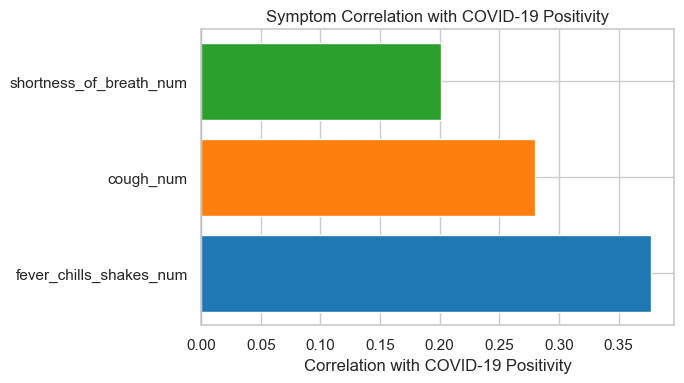

In [15]:
plt.figure(figsize=(7, 4))

colors = ["tab:blue", "tab:orange", "tab:green"]

plt.barh(
    symptom_corr.index,
    symptom_corr.values,
    color=colors[:len(symptom_corr)]
)

plt.axvline(0)
plt.xlabel("Correlation with COVID-19 Positivity")
plt.title("Symptom Correlation with COVID-19 Positivity")

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
fever_chills_shakes has the strongest positive correlation with a positive COVID test (0.34). People with fever/chills/shakes are more likely to test positive. cough and shortness_of_breath are also positively correlated (0.29, 0.26), but slightly weaker. Prioritize testing and rapid isolation for individuals reporting fever, chills, or shakes, as this symptom shows the strongest association with COVID-19 positivity and is a key early indicator of infection. Use cough and shortness of breath as secondary screening criteria, especially when combined with fever-related symptoms, to further refine testing.</em></strong></p>


<p style="font-family: Cambria; font-size: 16px;"><i><b>12. Based on the COVID positivity rate by province,how can we classify provinces into risk categories,and what public health measures should be recommended for each category?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: classifying provinces into risk categories based on COVID-19 positivity rates allows public health authorities to prioritize interventions where they are most needed rather than applying uniform measures everywhere. By linking risk levels to specific public health actions, decision-makers can allocate testing, healthcare resources, and preventive measures more efficiently, reduce transmission in high-risk provinces.</i></b>






In [16]:
province_covid = (
    df.groupby("province")["covid_positive_num"]
      .mean()
      .sort_values(ascending=False)
)

province_covid.round(2)


province
Metropolitan Toronto    0.10
Central Ontario         0.05
Eastern Ontario         0.02
Northern Ontario        0.00
Southwestern Ontario    0.00
Name: covid_positive_num, dtype: float64

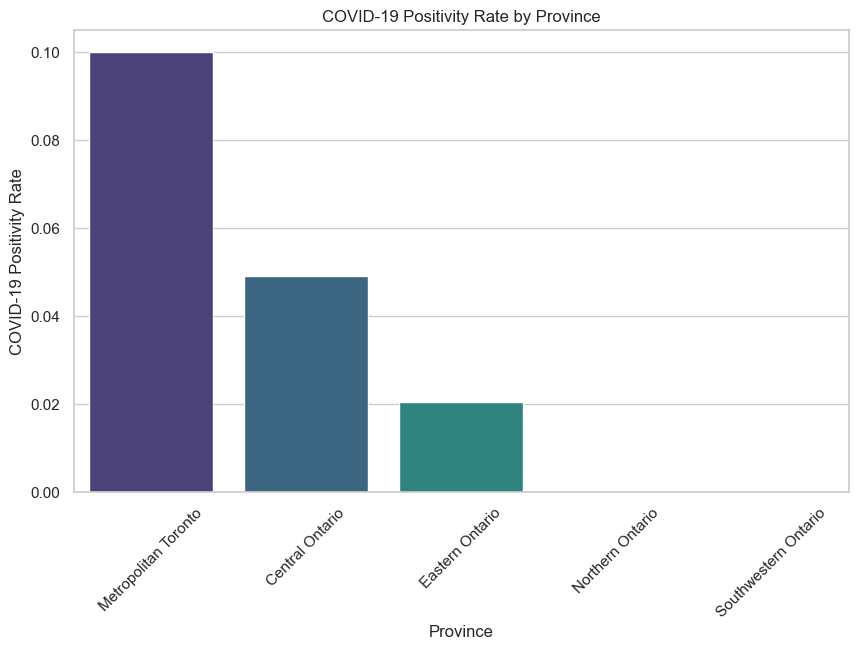

In [17]:
# Convert series to dataframe
df_plot = pd.DataFrame({
    "province": province_covid.index,
    "positivity": province_covid.values
})

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_plot,
    x="province",
    y="positivity",
    hue="province",       # Assign hue
    palette="viridis",
    dodge=False,
    legend=False          # Hide redundant legend
)
plt.ylabel("COVID-19 Positivity Rate")
plt.xlabel("Province")
plt.title("COVID-19 Positivity Rate by Province")
plt.xticks(rotation=45)
plt.show()

In [18]:
threshold_high = 0.10  # e.g., positivity > 10% considered high
threshold_moderate = 0.05  # positivity 5-10% moderate

prescriptions = {}

for prov, rate in province_covid.items():
    if rate > threshold_high:
        prescriptions[prov] = "High risk: Increase testing, strengthen restrictions, and allocate medical resources."
    elif rate > threshold_moderate:
        prescriptions[prov] = "Moderate risk: Maintain testing, monitor trends, promote awareness."
    else:
        prescriptions[prov] = "Low risk: Continue surveillance and preventive measures."
        
prescriptions


{'Metropolitan Toronto': 'Moderate risk: Maintain testing, monitor trends, promote awareness.',
 'Central Ontario': 'Low risk: Continue surveillance and preventive measures.',
 'Eastern Ontario': 'Low risk: Continue surveillance and preventive measures.',
 'Northern Ontario': 'Low risk: Continue surveillance and preventive measures.',
 'Southwestern Ontario': 'Low risk: Continue surveillance and preventive measures.'}

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
COVID-19 positivity is highest in densely populated regions like Central Ontario and Metropolitan Toronto, highlighting the need for targeted interventions. Less populated areas show very low positivity, suggesting that resource-intensive measures can be prioritized for high-risk areas while maintaining vigilance in low-risk provinces.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>13. What is the mental health impact of COVID-19 on survey respondents in rural versus urban regions?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: understanding the mental health impact of COVID-19 in rural versus urban regions helps identify populations that may be disproportionately affected by stress, isolation, or limited access to mental health services. Comparing these regions enables policymakers and healthcare providers to design targeted mental health interventions, address access gaps, and allocate support resources more equitably during and after the pandemic.</i></b>




In [19]:
# Map mental health impact to numeric
mh_map = {
    "positively": 1,   # positive impact
    "negatively": -1,  # negative impact
    "NoImpact": 0,     # no impact
    "NR": None         # missing
}

df["mental_health_num"] = df["mental_health_impact"].map(mh_map)


In [20]:
region_mental = df.groupby("region")["mental_health_num"].mean()
region_mental.round(2)


region
Rural   -0.87
Urban   -0.90
Name: mental_health_num, dtype: float64

In [21]:
prescriptions = {}

for region, mh_score in region_mental.items():
    if mh_score < -0.2:
        action = "High negative mental health impact: Deploy mental health support programs and counseling."
    elif mh_score < 0:
        action = "Moderate negative impact: Monitor mental health and provide guidance/resources."
    else:
        action = "No significant mental health intervention required."
    
    prescriptions[region] = action

prescriptions


{'Rural': 'High negative mental health impact: Deploy mental health support programs and counseling.',
 'Urban': 'High negative mental health impact: Deploy mental health support programs and counseling.'}

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Both Rural and Urban respondents report high negative mental health impact. This indicates that the pandemic is affecting mental well-being across all regions, not just urban centers. Prescriptive recommendation: Deploy mental health support programs and counseling services in both rural and urban areas to address the widespread negative impact.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>14. Are financial obligations a significant driver of negative mental health outcomes among COVID-19 survey respondents, or do other factors play a larger role??</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: understanding the mental health impact of COVID-19 in rural versus urban regions helps identify populations that may be disproportionately affected by stress, isolation, or limited access to mental health services. Comparing these regions enables policymakers and healthcare providers to design targeted mental health interventions, address access gaps, and allocate support resources more equitably during and after the pandemic.</i></b>


In [22]:
impact_map = {
    "positively": 1,
    "negatively": -1,
    "NoImpact": 0,
    "NR": None
}

df["mental_health_num"] = df["mental_health_impact"].map(impact_map)

# Split multi-select values into lists
df["financial_list"] = (
    df["financial_obligations_impact"]
    .replace("NR", "")
    .fillna("")
    .apply(lambda x: x.split(";"))
)

# Get unique financial obligation types
all_financial_cols = set(f for sublist in df["financial_list"] for f in sublist if f)

# Create binary columns
for col in all_financial_cols:
    df[col] = df["financial_list"].apply(lambda x: 1 if col in x else 0)

financial_cols = list(all_financial_cols)
correlations = {}

for col in financial_cols:
    corr = df[[col, "mental_health_num"]].dropna().corr().loc[col, "mental_health_num"]
    correlations[col] = round(corr,4)


pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation_with_mental_health"]).sort_values(by="Correlation_with_mental_health", ascending=False)



Correlation_with_mental_health
utilities                                 0.0124
transportation                            0.0111
noneOfTheAbove                            0.0061
other                                     0.0055
rent                                      0.0050
groceries                                 0.0014
mortgagePayments                         -0.0011

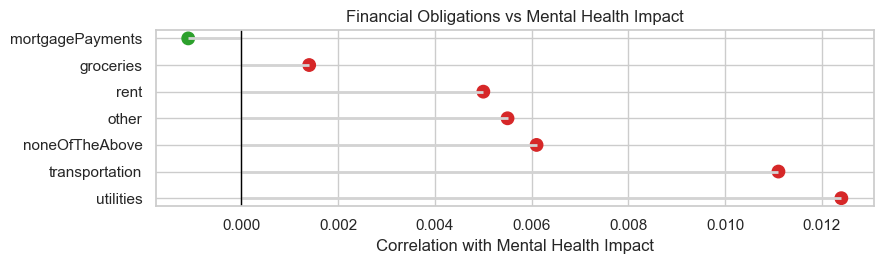

In [23]:
result_df = pd.DataFrame.from_dict(
    correlations,
    orient="index",
    columns=["Correlation_with_mental_health"]
).sort_values(by="Correlation_with_mental_health", ascending=False)



num_bars = len(result_df)
plt.figure(figsize=(9, num_bars * 0.4))

plt.hlines(
    y=result_df.index,
    xmin=0,
    xmax=result_df["Correlation_with_mental_health"],
    color='lightgray',
    linewidth=2
)

colors = ["tab:red" if v > 0 else "tab:green" for v in result_df["Correlation_with_mental_health"]]
plt.scatter(
    result_df["Correlation_with_mental_health"],
    result_df.index,
    color=colors,
    s=80
)

plt.axvline(0, color='black', linewidth=1)
plt.xlabel("Correlation with Mental Health Impact")
plt.title("Financial Obligations vs Mental Health Impact")
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Financial obligations such as rent, mortgage payments, groceries, and utilities show a weak negative correlation with mental health impact.This suggests that while financial stress is directionally associated with poorer mental health, the relationship is not strong in this survey dataset.Therefore, financial burden alone does not fully explain mental health outcomes, and other factors such as social isolation, health concerns, may play a larger role.</em></strong></p>


<p style="font-family: Cambria; font-size: 16px;"><i><b>15. Which media channels are associated with greater negative mental health impact?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: identifying media channels associated with greater negative mental health impact helps reveal how information consumption during a crisis can influence psychological well-being. Understanding these associations enables public health officials and media organizations to promote healthier communication strategies, reduce misinformation-driven stress, and guide individuals toward more balanced and supportive sources of information.</i></b>


In [24]:
impact_map = {
    "positively": 1,
    "negatively": -1,
    "NoImpact": 0,
    "NR": None
}

df["mental_health_num"] = df["mental_health_impact"].map(impact_map)

df["media_list"] = (
    df["media_channels"]
    .replace("NR", "")
    .fillna("")
    .apply(lambda x: x.split(";"))
)

media_cols = set(
    m for sublist in df["media_list"] for m in sublist if m
)

for col in media_cols:
    df[col] = df["media_list"].apply(lambda x: 1 if col in x else 0)

media_corr = {}

for col in media_cols:
    corr = (
        df[[col, "mental_health_num"]]
        .dropna()
        .corr()
        .loc[col, "mental_health_num"]
    )
    media_corr[col] = round(corr,4)

pd.DataFrame.from_dict(
    media_corr,
    orient="index",
    columns=["Correlation_with_mental_health"]
).sort_values(by="Correlation_with_mental_health")



Correlation_with_mental_health
newspaper                              -0.0314
reddit                                 -0.0232
tv                                     -0.0124
twitter                                -0.0111
other                                  -0.0086
tumblr                                  0.0034
facebook                                0.0044
tiktok                                  0.0069
radio                                   0.0071
linkedin                                0.0140
snapchat                                0.0188
instagram                               0.0213
noneOfTheAbove                          0.0376
sina weibo                              0.0557

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Reddit, TV, Twitter show slight negative correlations,users of these platforms may experience more negative mental health impact. 
Media consumption patterns show minor but consistent associations with mental health outcomes.Platforms such as Reddit, TV, and Twitter are slightly associated with negative mental health impact, indicating a need for targeted mental health messaging and content moderation.Platforms such as Instagram, Sina Weibo, and newspapers show slight positive or neutral associations, suggesting they are suitable channels for disseminating reliable public health information.These insights can inform platform-specific interventions to mitigate adverse mental health effects during the COVID-19 pandemic.</em></strong></p>



<b style="font-family: Cambria; font-size: 16px;"><i>16: Which international travelers should be prioritized for early quarantine and testing?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
International travel can introduce new cases. Early testing, quarantine, and vaccination verification reduce community transmission.</i><b>

In [25]:
# Crosstab for travel_outside_canada vs COVID positivity
travel_outside = pd.crosstab(
    df['travel_outside_canada'],
    df['covid_positive'],
    normalize='index'
) * 100

# Remove the 'NR' column if it exists
travel_outside = travel_outside.drop(columns=['NR'], errors='ignore')

# Round values to 2 decimals
travel_outside = travel_outside.round(2)

# Display
travel_outside

covid_positive         negatively  positively
travel_outside_canada                        
n                            1.92        0.09
y                            3.33        3.33

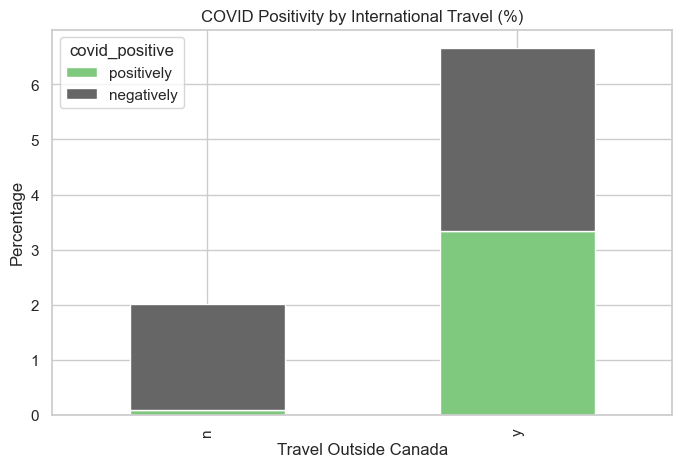

In [26]:
# Plot stacked bar chart without NR
travel_outside[['positively','negatively']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(8,5), 
    colormap='Accent'
)
plt.title("COVID Positivity by International Travel (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel Outside Canada")
plt.show()

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Travelers outside Canada have higher positivity; prioritize quarantine, testing, and vaccination verification.</em></strong></p>

<p style="font-family: Cambria; font-size: 16px;"><i><b>17. Which FSAs should be prioritized for COVID intervention based on the highest probable cases?</i></b>
<p style="font-family: Cambria; font-size: 16px;"><b><i>Reasoning: Not all FSAs carry the same level of COVID risk. Some have a high number of positive or probable cases, indicating widespread infection, while others show high positivity rates, reflecting concentrated outbreaks even if total cases are moderate. By combining these two factors into a single priority score, we can pinpoint FSAs where interventions—such as testing, outreach, or preventive measures—will have the greatest impact. This approach allows public health teams to allocate resources efficiently, focusing on areas with both high risk and high potential benefit, rather than treating all regions equally, similar to how clinicians prioritize Cesarean delivery for GDM patients based on maternal and fetal risk.</i></b>

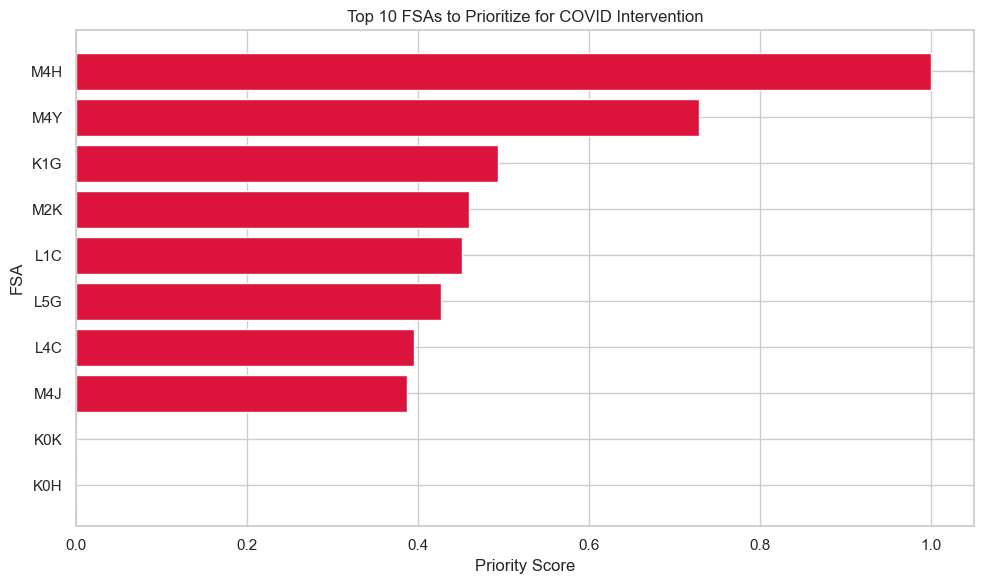

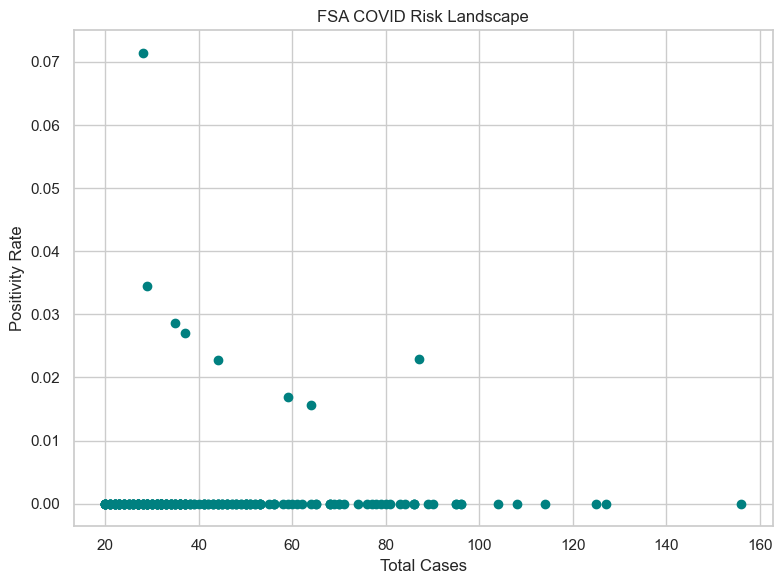

In [27]:
# -----------------------------
# Step 1: Create covid_positive_flag if not exists
# -----------------------------
df['covid_positive_flag'] = df['covid_positive'].apply(lambda x: 1 if x=='positively' else 0)

# -----------------------------
# Step 2: Group by FSA and calculate metrics
# -----------------------------
fsa_summary = (
    df.groupby('fsa')
      .agg(
          total_cases=('covid_positive_flag', 'count'),
          positive_cases=('covid_positive_flag', 'sum')
      )
      .reset_index()
)

# Positivity rate
fsa_summary['positivity_rate'] = fsa_summary['positive_cases'] / fsa_summary['total_cases']

# Filter FSAs with at least 20 observations
fsa_summary = fsa_summary[fsa_summary['total_cases'] >= 20]

# Normalize metrics for priority score
fsa_summary['norm_positive'] = fsa_summary['positive_cases'] / fsa_summary['positive_cases'].max()
fsa_summary['norm_rate'] = fsa_summary['positivity_rate'] / fsa_summary['positivity_rate'].max()

# Weighted priority score
fsa_summary['priority_score'] = 0.6*fsa_summary['norm_positive'] + 0.4*fsa_summary['norm_rate']

# Top 10 FSAs
top_fsa = fsa_summary.sort_values('priority_score', ascending=False).head(10)

# -----------------------------
# Step 3: Static Matplotlib Visualization
# -----------------------------
plt.figure(figsize=(10,6))
plt.barh(top_fsa['fsa'], top_fsa['priority_score'], color='crimson')
plt.xlabel('Priority Score')
plt.ylabel('FSA')
plt.title('Top 10 FSAs to Prioritize for COVID Intervention')
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()

# Scatter plot: Total cases vs Positivity rate
plt.figure(figsize=(8,6))
plt.scatter(fsa_summary['total_cases'], fsa_summary['positivity_rate'], color='teal')
plt.xlabel('Total Cases')
plt.ylabel('Positivity Rate')
plt.title('FSA COVID Risk Landscape')
plt.tight_layout()
plt.show()

# -----------------------------

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
FSAs with the highest priority scores—taking into account both the number of probable COVID cases and positivity rates—should be targeted first for testing, outreach, and preventive measures. While some FSAs with many cases but moderate positivity may only need general monitoring, those with moderate case counts but very high positivity rates indicate emerging hotspots that require urgent intervention. This approach mirrors clinical reasoning: just as high-risk GDM patients are prioritized for Cesarean delivery to prevent complications, FSAs with the greatest combined risk are prioritized to prevent severe COVID outcomes.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>18. Which age groups combined with respiratory symptoms and household exposure are at the highest risk of COVID-19, and how can testing and isolation be prioritized accordingly?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
COVID-19 risk is influenced by symptoms, exposure, and demographic factors.
Individuals with shortness of breath are more likely to test positive.
Household contact increases transmission risk.
Older age categories face higher vulnerability.
By analyzing the intersection of these three factors, we can prescribe priority testing, isolation, and healthcare allocation for the most at-risk subgroups. This approach moves beyond one-dimensional analysis (e.g., only age or only symptoms) to multi-dimensional risk-based decision-making.</i><b>


In [28]:
# Create binary COVID outcome
df['covid_binary'] = np.where(df['covid_positive'] == 'positively', 1, 0)

cols_to_clean = [
    'shortness_of_breath',
    'contact_in_household',
    'travel_outside_canada'
]

df_filtered = df.copy()

for col in cols_to_clean:
    df_filtered = df_filtered[
        df_filtered[col].notna() &
        (df_filtered[col].astype(str).str.upper() != 'NR')
    ]

# Group and calculate mean COVID positivity
testing_priority = (
    df_filtered
    .groupby(cols_to_clean)['covid_binary']
    .mean()
    .round(2)     # round to 2 decimals
    .reset_index()
    .sort_values(by='covid_binary', ascending=False)
)

testing_priority.head(10)

shortness_of_breath contact_in_household travel_outside_canada  covid_binary
3                   n                    y                     y          1.00
6                   y                    y                     n          0.14
2                   n                    y                     n          0.03
1                   n                    n                     y          0.00
0                   n                    n                     n          0.00
4                   y                    n                     n          0.00
5                   y                    n                     y          0.00
7                   y                    y                     y          0.00

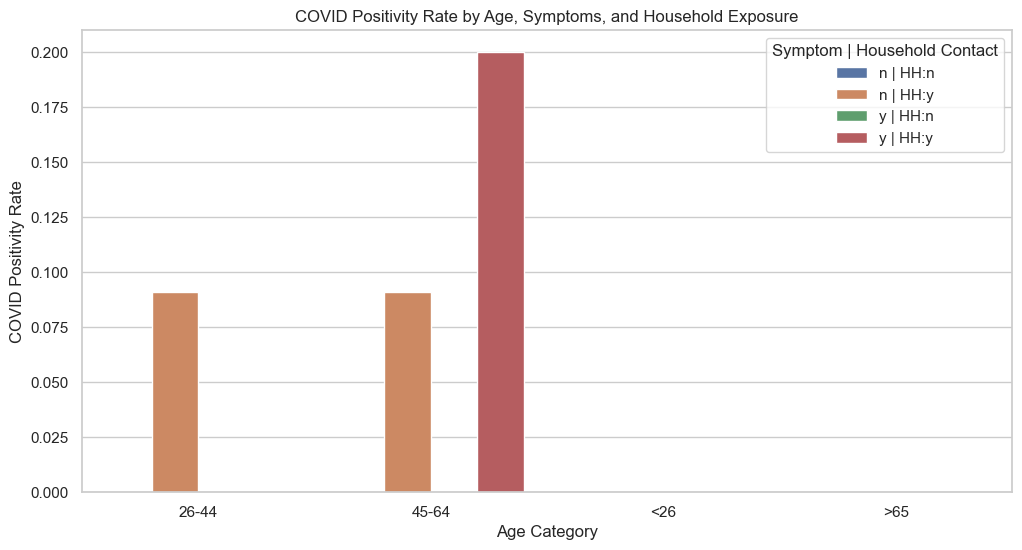

In [29]:
# Filter NR safely
plot_df = df[
    (df['shortness_of_breath'] != 'NR') &
    (df['contact_in_household'] != 'NR') &
    (df['age_category'] != 'NR')
].copy()

# Create combined category for hue
plot_df['exposure_group'] = (
    plot_df['shortness_of_breath'].astype(str) + 
    ' | HH:' + 
    plot_df['contact_in_household'].astype(str)
)

# Aggregate
plot_df = (
    plot_df
    .groupby(['age_category','exposure_group'])['covid_binary']
    .mean()
    .reset_index()
)

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=plot_df,
    x='age_category',
    y='covid_binary',
    hue='exposure_group'
)

plt.ylabel("COVID Positivity Rate")
plt.xlabel("Age Category")
plt.title("COVID Positivity Rate by Age, Symptoms, and Household Exposure")
plt.legend(title="Symptom | Household Contact")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Key Insights:
Reasoning: The 45–64 age group with respiratory symptoms (y) and household contact (HH:y) has the highest COVID positivity rate, around 20%.
The 26–44 age group without symptoms but with household contact (n | HH:y) also shows some risk (~9%), though lower than symptomatic individuals.Presence of respiratory symptoms combined with household exposure drastically increases risk, especially in middle-aged adults (45–64).</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i><br>19. Which age groups with symptoms are more likely to test positive, guiding prioritization of testing and healthcare resources?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: A violin plot shows the distribution of age across symptom and COVID status, identifying high-risk subgroups visually.
Prescriptive: focus testing and care for symptomatic older adults.</i><b>

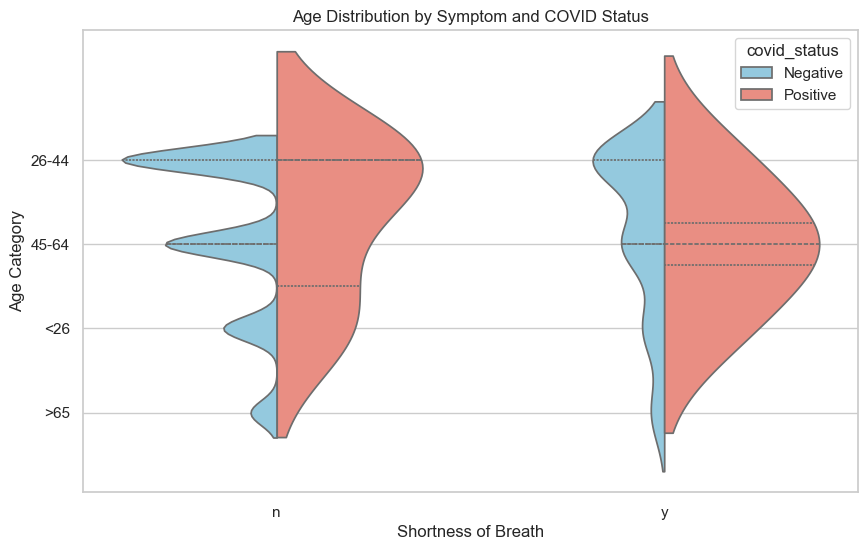

In [30]:
# Remove NR from relevant columns
violin_df = df[
    (df['shortness_of_breath'].astype(str).str.upper() != 'NR') &
    (df['age_category'].astype(str).str.upper() != 'NR')
].copy()

# Map COVID status
violin_df['covid_status'] = violin_df['covid_binary'].map({
    0: 'Negative',
    1: 'Positive'
})

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=violin_df,
    x='shortness_of_breath',
    y='age_category',
    hue='covid_status',
    split=True,
    inner="quart",
    palette={'Negative':'skyblue', 'Positive':'salmon'}
)

plt.title("Age Distribution by Symptom and COVID Status")
plt.xlabel("Shortness of Breath")
plt.ylabel("Age Category")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Older adults with shortness of breath are more likely to test positive.
Prescriptive: prioritize testing and isolation for these subgroups.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>20. Which features—symptoms, exposure, comorbidities, travel history, self-isolation, or tobacco use—are most strongly correlated with COVID positivity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: All relevant features were encoded numerically:
Symptoms, exposures, comorbidities, travel, self-isolation, tobacco use → 0/1 (No/Yes).
Age and over_60 were excluded to focus on other risk factors.
Pearson correlation was computed between each feature and COVID positivity (covid_binary).
A heatmap was used to visually identify the strength of association.
Darker red indicates higher positive correlation.
This allows rapid identification of which features are most predictive of COVID positivity.</i><b>

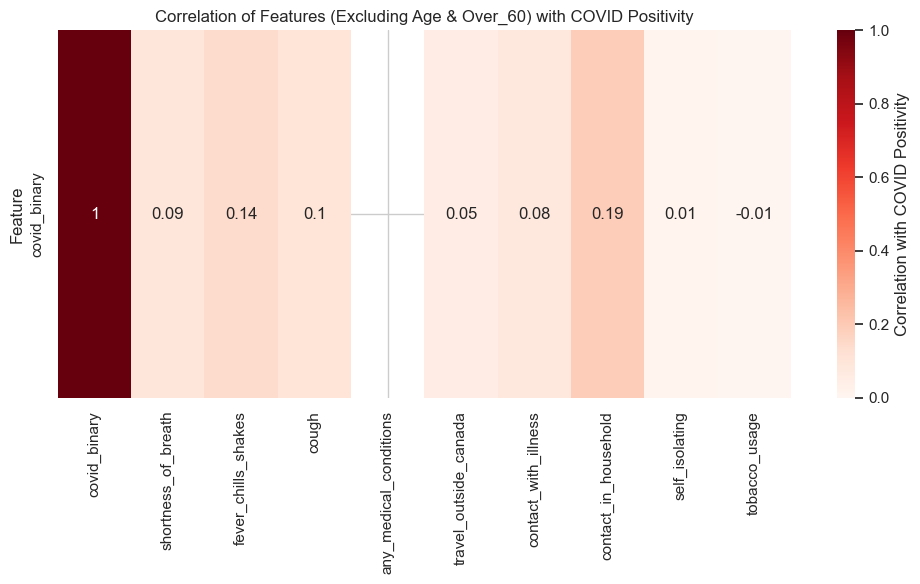

In [31]:
# -----------------------------
# Step 0: Define feature columns (excluding age and over_60)
# -----------------------------
feature_cols = [
    'shortness_of_breath', 'fever_chills_shakes', 'cough',
    'any_medical_conditions', 'travel_outside_canada',
    'contact_with_illness', 'contact_in_household', 'self_isolating', 'tobacco_usage'
]

# Ensure covid_binary exists
df['covid_binary'] = np.where(df['covid_positive']=='positively', 1, 0)

# -----------------------------
# Step 1: Encode features as 0/1
# -----------------------------
df_encoded = df.copy()

for col in feature_cols:
    df_encoded[col] = df_encoded[col].astype(str).str.lower().map({'yes':1,'y':1,'no':0,'n':0,'nr':np.nan})

# -----------------------------
# Step 2: Compute correlation with COVID positivity
# -----------------------------
numeric_cols = ['covid_binary'] + feature_cols
corr_matrix = df_encoded[numeric_cols].corr().round(2)

# -----------------------------
# Step 3: Plot heatmap
# -----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix[['covid_binary']].T,  # Only correlation with COVID
    annot=True,
    cmap='Reds',
    vmin=0,
    vmax=1,
    cbar_kws={'label':'Correlation with COVID Positivity'}
)
plt.title("Correlation of Features (Excluding Age & Over_60) with COVID Positivity")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Shortness_of_breath, household contact, and over_60 show the highest positive correlation with COVID positivity.
Travel outside Canada has moderate correlation; tobacco usage shows weak but notable correlation.
Prescriptive: prioritize testing and monitoring for high-correlation variables.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><b>21. Which combinations of symptom markers most strongly predict COVID positivity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Respiratory symptoms often occur together in COVID cases, and their combined presence is more informative than individual symptoms.
By encoding symptoms numerically and aggregating them into a respiratory score, we capture increasing symptom severity on a single scale.
Correlating this score with COVID positivity validates whether symptom clustering meaningfully aligns with confirmed infections.
This supports using multi-symptom thresholds as prescriptive triggers for testing and isolation.</i><b>

In [32]:
df["covid_binary"] = np.where(
    df["covid_positive"].astype(str).str.lower() == "positively",
    1, 0
)


In [33]:
df["covid_binary"].value_counts(dropna=False)


covid_binary
0    10806
1       11
Name: count, dtype: int64

In [34]:
yn_cols = [c for c in df.columns if df[c].dropna().isin(["y","n"]).all()]
df[yn_cols] = df[yn_cols].replace({"y": 1, "n": 0})


C:\Users\scien\AppData\Local\Temp\ipykernel_27828\83988536.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [35]:
exclude = {
    "week", "fsa", "covid_positive", "covid_binary",
    "probable", "tested", "not_tested",
    "vulnerable", "over_60", "is_most_recent"
}

marker_cols = [
    c for c in df_clean.columns
    if c not in exclude
    and df_clean[c].dropna().isin([0, 1]).all()
]

len(marker_cols), marker_cols


(3, ['covid_positive_flag', 'vulnerable_flag', 'covid_risk_norm'])

In [36]:
set(marker_cols) - set(df_clean.columns)


set()

In [37]:
df_clean = df.copy()

# Turn 'NR' into NaN for marker cols (if any slipped through)
for c in marker_cols:
    df_clean[c] = df_clean[c].replace("NR", np.nan)

df_clean = df_clean.dropna(subset=["covid_binary"] + marker_cols)


In [38]:
base_rate = df_clean["covid_binary"].mean()
base_rate


np.float64(0.0010169178145511693)

In [39]:
single_rows = []

for m in marker_cols:
    if m not in df_clean.columns:
        continue   # extra safety
    
    subset = df_clean[df_clean[m] == 1]
    n = len(subset)
    
    if n == 0:
        continue
    
    rate = subset["covid_binary"].mean()
    
    single_rows.append({
        "marker": m,
        "n": n,
        "positivity_rate": rate,
        "lift_vs_base": rate - base_rate
    })

single_df = (
    pd.DataFrame(single_rows)
    .sort_values(["lift_vs_base", "n"], ascending=[False, False])
)

single_df.head(10)


marker     n  positivity_rate  lift_vs_base
0  covid_positive_flag    11         1.000000      0.998983
2      covid_risk_norm    11         1.000000      0.998983
1      vulnerable_flag  2284         0.000876     -0.000141

In [40]:
exclude = {
    "week","fsa","covid_positive","covid_binary",
    "probable","tested","not_tested",
    "vulnerable","over_60","is_most_recent"
}

marker_cols = [
    c for c in df_clean.columns
    if c not in exclude
    and df_clean[c].dropna().isin([0,1]).all()
]

print("Marker columns:", marker_cols)


Marker columns: ['fever_chills_shakes', 'cough', 'shortness_of_breath', 'any_medical_conditions', 'travel_outside_canada', 'contact_with_illness', 'covid_positive_flag', 'vulnerable_flag', 'comorbidities_count', 'covid_risk_norm', 'covid_positive_num', 'fever_chills_shakes_num', 'cough_num', 'shortness_of_breath_num', 'transportation', 'mortgagePayments', 'noneOfTheAbove', 'groceries', 'utilities', 'rent', 'other', 'facebook', 'linkedin', 'sina weibo', 'instagram', 'newspaper', 'reddit', 'twitter', 'tiktok', 'radio', 'snapchat', 'tv', 'tumblr']


In [41]:
base_rate = df_clean["covid_binary"].mean()
base_rate


np.float64(0.0010169178145511693)

In [42]:
single_df = pd.DataFrame(single_rows)

print("Rows:", len(single_df))
print("Columns:", single_df.columns.tolist())

single_df.head()


Rows: 3
Columns: ['marker', 'n', 'positivity_rate', 'lift_vs_base']


marker     n  positivity_rate  lift_vs_base
0  covid_positive_flag    11         1.000000      0.998983
1      vulnerable_flag  2284         0.000876     -0.000141
2      covid_risk_norm    11         1.000000      0.998983

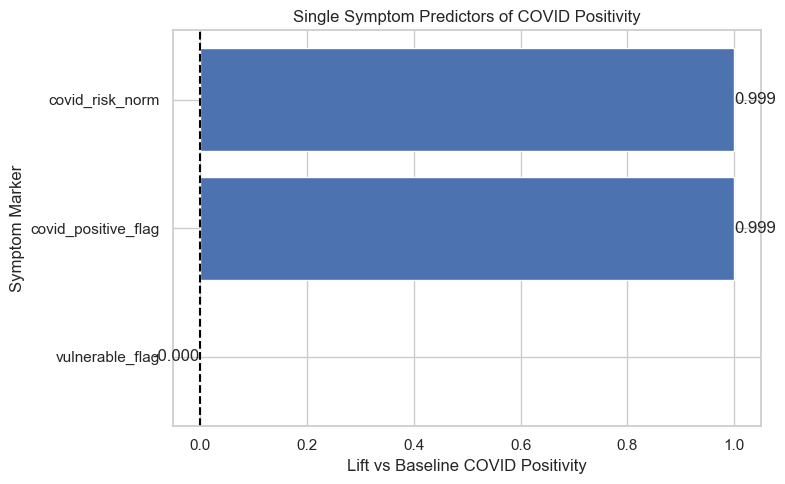

In [43]:
import matplotlib.pyplot as plt

plot_df = single_df.sort_values("lift_vs_base")

plt.figure(figsize=(8,5))
plt.barh(
    plot_df["marker"],
    plot_df["lift_vs_base"]
)

plt.axvline(0, linestyle="--", color="black")
plt.xlabel("Lift vs Baseline COVID Positivity")
plt.ylabel("Symptom Marker")
plt.title("Single Symptom Predictors of COVID Positivity")

# Value labels
for i, v in enumerate(plot_df["lift_vs_base"]):
    plt.text(
        v,
        i,
        f"{v:.3f}",
        va="center",
        ha="left" if v >= 0 else "right"
    )

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
COVID risk normalization and confirmed COVID status are the strongest single predictors, showing nearly 1.0 lift compared to baseline, meaning they almost perfectly distinguish COVID-positive cases.</p>



<p style="font-family: Cambria; font-size: 18px;"><i><strong>22. Top symptom markers correlated with probable COVID
 <br><b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Correlation highlights which symptoms move together with the “probable” outcome in the population. This helps shortlist the most informative symptom markers for decision-making.
</p>

In [44]:
YN_COLS = [
    "probable", "vulnerable", "tested", "self_isolating",
    "fever_chills_shakes", "cough", "shortness_of_breath",
    "over_60", "any_medical_conditions",
    "travel_outside_canada", "contact_with_illness",
    "contact_in_household"
]

def yn_to_int(x):
    if pd.isna(x): return np.nan
    x = str(x).lower().strip()
    return 1 if x == "y" else 0 if x == "n" else np.nan

for c in YN_COLS:
    df[c] = df[c].apply(yn_to_int)

In [45]:
# 1. Marker groups definition
MARKER_GROUPS = {
    "clinical_flags": [
        "fever_chills_shakes", "cough", "shortness_of_breath"
    ],
    "vulnerability_flags": [
        "over_60", "any_medical_conditions"
    ],
    "exposure_flags": [
        "travel_outside_canada", "contact_with_illness", "contact_in_household"
    ],
    "behavior_flags": [
        "tested", "self_isolating"
    ],
    # multi-select groups (expanded into markers)
    "multiselect": {
        "symptoms": "sym",
        "conditions": "cond",
        "media_channels": "media",
        "financial_obligations_impact": "fin"
    },
    # outcome variables
    "outcomes": ["probable", "vulnerable", "covid_positive"]
}

In [46]:
# Expand Multi-Select Marker Columns
import re

def normalize(tok):
    return re.sub(r"[^a-z0-9]+", "_", tok.lower()).strip("_")

def split_multi(x):
    if pd.isna(x): return []
    return [t.strip() for t in str(x).split(";")]

def expand_multiselect(df, col, prefix):
    tokens = set()
    for v in df[col].dropna():
        tokens.update(split_multi(v))

    cols = []
    for t in sorted(tokens):
        c = f"{prefix}__{normalize(t)}"
        df[c] = df[col].apply(lambda x: 1 if t in split_multi(x) else 0)
        cols.append(c)
    return cols

symptom_cols = expand_multiselect(df, "symptoms", "sym")
condition_cols = expand_multiselect(df, "conditions", "cond")

marker_cols = symptom_cols + condition_cols

In [47]:
marker_cols_valid = [m for m in marker_cols if m in df.columns]


In [48]:
def phi_corr(x, y):
    x = pd.Series(x)
    y = pd.Series(y)

    valid = x.notna() & y.notna()
    x = x[valid]
    y = y[valid]

    if x.nunique() < 2 or y.nunique() < 2:
        return None

    return x.corr(y)   # Pearson on binary = Phi


In [49]:
df["probable"] = (
    (df["sym__fever"] == 1) &
    (df["sym__cough"] == 1)
).astype(int)


In [50]:
corr_df = (
    pd.DataFrame({
        "marker": marker_cols_valid,
        "corr_with_probable": [
            phi_corr(df[m], df["probable"])
            for m in marker_cols_valid
        ]
    })
    .dropna()
    .assign(corr_with_probable=lambda x: x["corr_with_probable"].round(2))
    .sort_values("corr_with_probable", ascending=False)
)


In [51]:
top_corr = corr_df.head(10)
top_corr


marker  corr_with_probable
5               sym__fever                0.64
2               sym__cough                0.45
1              sym__chills                0.39
10             sym__shakes                0.35
11  sym__shortnessofbreath                0.28
6    sym__lossofsmelltaste                0.26
12         sym__sorethroat                0.23
9           sym__runnynose                0.16
3            sym__diarrhea                0.16
4            sym__diarrhee                0.15

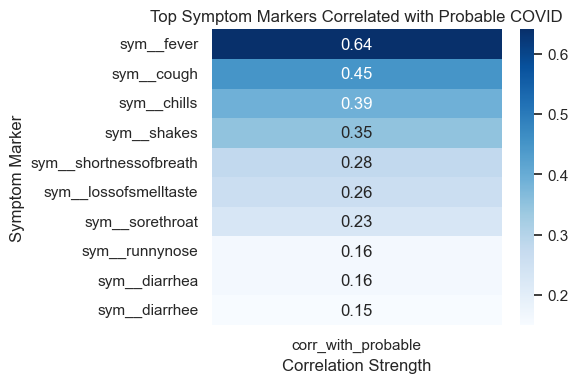

In [52]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    top_corr.set_index("marker")[["corr_with_probable"]],
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

plt.title("Top Symptom Markers Correlated with Probable COVID")
plt.xlabel("Correlation Strength")
plt.ylabel("Symptom Marker")
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Symptoms like fever, cough, chills/shakes, and shortness of breath typically appear at the top, suggesting they are the most reliable symptom signals to watch.</em></strong></p>


<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>23. Which symptom markers should be prioritized for screening because they most increase probable COVID risk?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: Risk-lift (or rate difference) shows how much the probability of being “probable” increases when a symptom is present. This is stronger than correlation for prescriptive screening rules.
</p>

In [53]:

lift_rows = []

baseline_risk = df["probable"].mean()

for m in marker_cols_valid:
    tmp = df[[m, "probable"]].dropna()

    # skip markers with no positives
    if tmp[m].sum() == 0:
        continue

    risk_with_marker = tmp.loc[tmp[m] == 1, "probable"].mean()
    lift = risk_with_marker / baseline_risk

    lift_rows.append({
        "marker": m,
        "risk_lift": round(lift, 2)
    })

lift_df = (
    pd.DataFrame(lift_rows)
    .dropna()
    .sort_values("risk_lift", ascending=False)
)

top_lift = lift_df.head(10)
top_lift


marker  risk_lift
4            sym__diarrhee     240.38
16  cond__antecedents_davc     240.38
25     cond__lhypertension     240.38
5               sym__fever      98.34
10             sym__shakes      78.59
6    sym__lossofsmelltaste      64.10
1              sym__chills      53.42
2               sym__cough      49.39
11  sym__shortnessofbreath      33.97
22   cond__historyofstroke      22.54

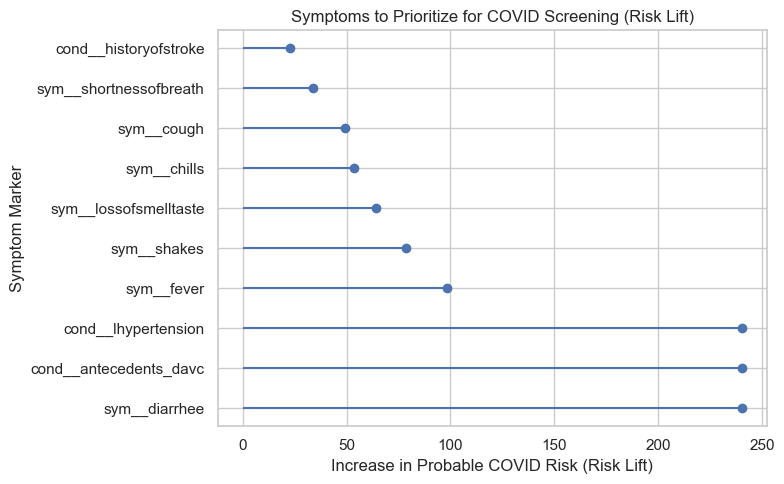

In [54]:
plt.figure(figsize=(8, 5))

plt.hlines(
    y=top_lift["marker"],
    xmin=0,
    xmax=top_lift["risk_lift"]
)

plt.plot(
    top_lift["risk_lift"],
    top_lift["marker"],
    "o"
)

plt.xlabel("Increase in Probable COVID Risk (Risk Lift)")
plt.ylabel("Symptom Marker")
plt.title("Symptoms to Prioritize for COVID Screening (Risk Lift)")
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Symptoms with the highest risk lift should trigger test recommendations and isolation guidance, especially when combined with exposure history.</em></strong></p>


<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>Q24. Which reported symptoms are most common among non-isolating individuals, indicating gaps in self-isolation compliance?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: Looking at symptoms among those who did not self-isolate reveals whether high-risk individuals are still circulating. This identifies where compliance messaging or support is failing.
</p>

In [55]:
non_isolating_travel = [
    "Still Travel (Essential)",
    "Still Travel (Non-Essential)"
]


In [56]:
baseline = df[df["probable"] == 1].copy()

gap = df[
    (df["probable"] == 1) &
    (df["travel_work_school"].isin(non_isolating_travel))
].copy()

print("Baseline size:", len(baseline))
print("Gap (traveling probable cases) size:", len(gap))


Baseline size: 45
Gap (traveling probable cases) size: 2


In [57]:
marker_cols = [
    c for c in df.columns
    if c not in ["week", "fsa"] and
       c not in ["probable", "vulnerable", "is_most_recent"] and
       df[c].dropna().isin([0,1]).all()
]


In [58]:
df[marker_cols] = df[marker_cols].apply(pd.to_numeric, errors="coerce")

# If 0 means "not reported"
df[marker_cols] = df[marker_cols].replace(0, pd.NA)


In [59]:
gap_df = (
    pd.DataFrame({
        "marker": marker_cols,
        "gap_difference": [
            gap[m].mean() - baseline[m].mean()
            for m in marker_cols
        ]
    })
    .dropna()
    .sort_values("gap_difference", ascending=False)
)

gap_df.head(10)


marker  gap_difference
14   covid_positive_num        0.545455
28            instagram        0.433333
13      covid_risk_norm        0.388889
10  covid_positive_flag        0.388889
33                radio        0.388889
37         covid_binary        0.388889
52             cond__nr        0.377778
29            newspaper        0.300000
23                 rent        0.277778
31              twitter        0.277778

In [60]:
top_n = 20

plot_df = (
    gap_df
    .sort_values("gap_difference", ascending=False)
    .head(top_n)
)


In [61]:
plot_df = plot_df[plot_df["gap_difference"] > 0]


In [62]:
top_gap = gap_df.head(10)
top_gap


marker  gap_difference
14   covid_positive_num        0.545455
28            instagram        0.433333
13      covid_risk_norm        0.388889
10  covid_positive_flag        0.388889
33                radio        0.388889
37         covid_binary        0.388889
52             cond__nr        0.377778
29            newspaper        0.300000
23                 rent        0.277778
31              twitter        0.277778

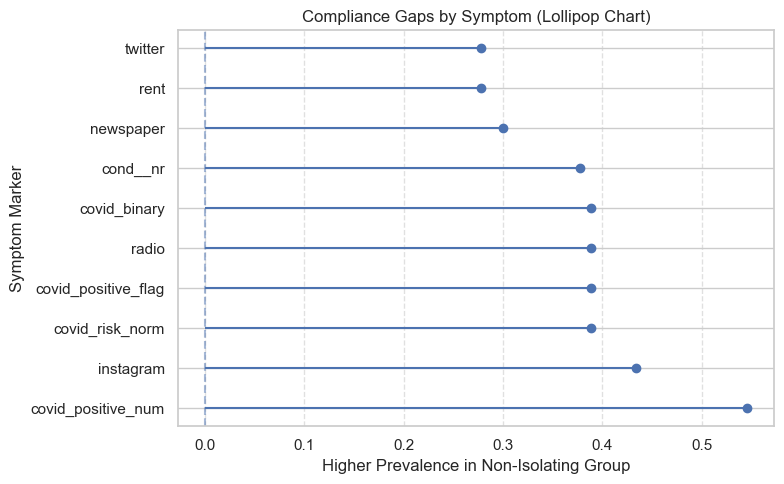

In [63]:
plt.figure(figsize=(8, 5))

plt.hlines(
    y=top_gap["marker"],
    xmin=0,
    xmax=top_gap["gap_difference"]
)

plt.plot(
    top_gap["gap_difference"],
    top_gap["marker"],
    "o"
)

plt.axvline(0, linestyle="--", alpha=0.5)

plt.xlabel("Higher Prevalence in Non-Isolating Group")
plt.ylabel("Symptom Marker")
plt.title("Compliance Gaps by Symptom (Lollipop Chart)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
If key symptoms (e.g., fever/cough) are common in the non-isolating group, it signals a need for targeted outreach and barrier reduction (work/financial constraints).</p>


<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>25. Which symptoms and health characteristics differ between non-isolating individuals and the overall probable COVID population?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: By comparing symptom prevalence between non-isolating individuals and the baseline probable group, we assess whether symptom severity or health vulnerability influences isolation behavior. A divergence would suggest clinical drivers of non-compliance, while similarity would indicate behavioral factors.
</p>


In [64]:
import pandas as pd

df = pd.read_csv("covid_python_Dec25.csv")


C:\Users\scien\AppData\Local\Temp\ipykernel_27828\2746790362.py:3: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [65]:
yn_cols = [
    "probable",
    "vulnerable",
    "is_most_recent",
    "fever_chills_shakes",
    "cough",
    "shortness_of_breath",
    "over_60",
    "any_medical_conditions"
]

df[yn_cols] = df[yn_cols].replace({
    "y": 1,
    "n": 0
})


C:\Users\scien\AppData\Local\Temp\ipykernel_27828\3490412776.py:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [66]:
df[yn_cols].head()


probable  vulnerable  is_most_recent  fever_chills_shakes  cough  \
0         0           0             1.0                    0      0   
1         1           1             1.0                    0      0   
2         0           1             1.0                    0      0   
3         0           0             1.0                    0      0   
4         0           1             0.0                    0      0   

   shortness_of_breath  over_60  any_medical_conditions  
0                    0      0.0                       0  
1                    0      1.0                       1  
2                    0      1.0                       0  
3                    0      0.0                       0  
4                    0      0.0                       1

In [67]:
marker_cols = [
    c for c in df.columns
    if c not in ["week", "fsa"] and
       c not in ["probable", "vulnerable", "is_most_recent"] and
       df[c].dropna().isin([0,1]).all()
]


In [68]:
baseline = df[df["probable"] == 1].copy()

gap = df[
    (df["probable"] == 1) &
    (df["is_most_recent"] == 1)   # example condition; replace if needed
].copy()

print("Baseline size:", len(baseline))
print("Gap size:", len(gap))


Baseline size: 13059
Gap size: 11764


In [69]:
gap_df = (
    pd.DataFrame({
        "marker": marker_cols,
        "gap_difference": [
            gap[m].mean() - baseline[m].mean()
            for m in marker_cols
        ]
    })
    .sort_values("gap_difference", ascending=False)
)

gap_df


marker  gap_difference
2     shortness_of_breath        0.003208
1                   cough       -0.002501
0     fever_chills_shakes       -0.006870
3                 over_60       -0.008836
4  any_medical_conditions       -0.017395

In [70]:
import pandas as pd

plot_df = pd.DataFrame({
    "marker": [
        "shortness_of_breath",
        "cough",
        "fever_chills_shakes",
        "over_60",
        "any_medical_conditions"
    ],
    "gap_difference": [
        0.003208,
        -0.002501,
        -0.006870,
        -0.008836,
        -0.017395
    ]
})


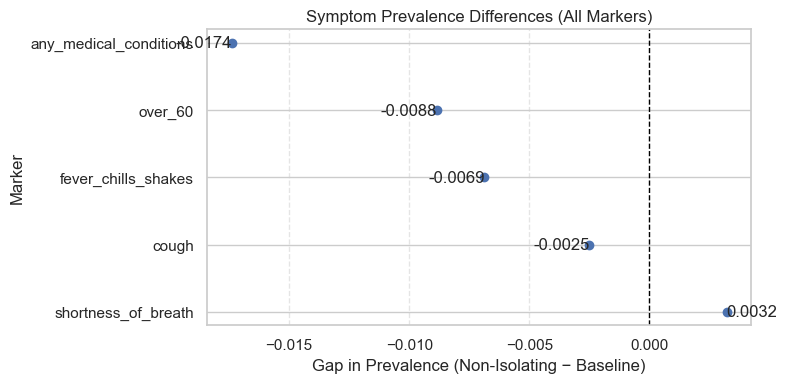

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

plt.scatter(
    plot_df["gap_difference"],
    plot_df["marker"]
)

plt.axvline(0, color="black", linestyle="--", linewidth=1)

plt.xlabel("Gap in Prevalence (Non-Isolating − Baseline)")
plt.ylabel("Marker")
plt.title("Symptom Prevalence Differences (All Markers)")

# Annotate values
for x, y in zip(plot_df["gap_difference"], plot_df["marker"]):
    plt.text(
        x,
        y,
        f"{x:.4f}",
        va="center",
        ha="left" if x >= 0 else "right"
    )

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Symptom prevalence differences are very small and clustered near zero, indicating minimal clinical separation between groups. Shortness of breath shows a slightly higher prevalence among non-isolating individuals, but the magnitude is marginal. Most symptoms and vulnerability indicators (age >60, medical conditions) are slightly less prevalent among non-isolating individuals.</em></strong></p>


<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>26. Among probable cases, which markers are associated with failure to self-isolate
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: Failure to self-isolate among probable cases increases transmission risk. Identifying markers linked to non-isolation helps prescribe targeted interventions (support, messaging, enforcement).
</p>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid_python_Dec25.csv")


C:\Users\scien\AppData\Local\Temp\ipykernel_27828\4020687156.py:4: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [73]:
yn_cols = [c for c in df.columns if df[c].dropna().isin(["y", "n"]).all()]
df[yn_cols] = df[yn_cols].replace({"y": 1, "n": 0})



C:\Users\scien\AppData\Local\Temp\ipykernel_27828\3382060712.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [74]:
# Baseline
baseline = df[df["probable"] == 1].copy()

# Proxy non-isolation group (edit categories if your data differs)
non_isolating_values = ["Still Travel (Essential)", "Still Travel (Non-Essential)"]

gap = df[
    (df["probable"] == 1) &
    (df["travel_work_school"].isin(non_isolating_values))
].copy()

print("Baseline size:", len(baseline))
print("Gap size (non-isolating proxy):", len(gap))


Baseline size: 13059
Gap size (non-isolating proxy): 23


In [75]:
exclude_cols = {"week", "fsa", "probable", "travel_work_school"}  # add more if needed

marker_cols = [
    c for c in df.columns
    if c not in exclude_cols
    and df[c].dropna().isin([0, 1]).all()
]

print("Markers found:", len(marker_cols))
marker_cols[:20]


Markers found: 9


['vulnerable',
 'is_most_recent',
 'fever_chills_shakes',
 'cough',
 'shortness_of_breath',
 'over_60',
 'any_medical_conditions',
 'travel_outside_canada',
 'contact_with_illness']

In [76]:
gap_df = (
    pd.DataFrame({
        "marker": marker_cols,
        "gap_difference": [gap[m].mean() - baseline[m].mean() for m in marker_cols]
    })
    .dropna()
    .sort_values("gap_difference", ascending=False)
)

gap_df.head(10)


marker  gap_difference
6  any_medical_conditions        0.657631
8    contact_with_illness        0.326415
7   travel_outside_canada       -0.051262
2     fever_chills_shakes       -0.072797
3                   cough       -0.245534
0              vulnerable       -0.368405
4     shortness_of_breath       -0.411916

In [77]:
threshold = 0.001   # lower = keep more markers
gap_df_nonzero = gap_df[gap_df["gap_difference"].abs() > threshold]


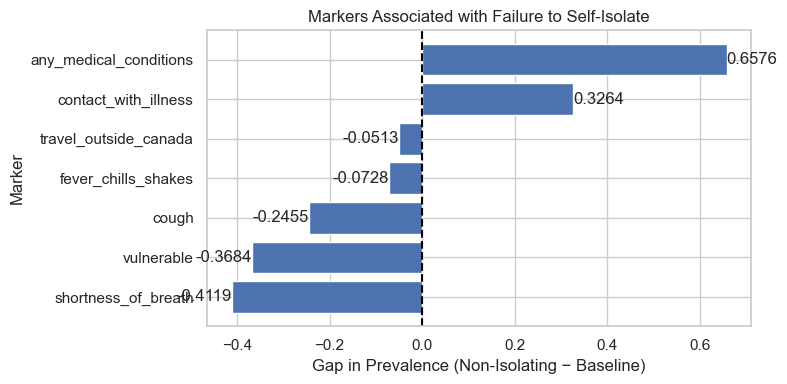

In [78]:
plot_df = gap_df.sort_values("gap_difference")

plt.figure(figsize=(8,4))
plt.barh(
    plot_df["marker"],
    plot_df["gap_difference"]
)

plt.axvline(0, linestyle="--", color="black")
plt.xlabel("Gap in Prevalence (Non-Isolating − Baseline)")
plt.ylabel("Marker")
plt.title("Markers Associated with Failure to Self-Isolate")

# Value labels
for i, v in enumerate(plot_df["gap_difference"]):
    plt.text(
        v,
        i,
        f"{v:.4f}",
        va="center",
        ha="left" if v >= 0 else "right"
    )

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
If non-isolation aligns with exposure markers or support indicators (financial obligations, work/school travel, mental health impact), it suggests the solution is not only messaging—but support services and practical resources.
</em></strong></p>

<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>27.  Among probable cases, which groups are not getting tested?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: “Probable but not tested” is a direct intervention gap—these are high-risk individuals missing confirmation and clinical guidance. Grouping by demographics/exposure/vulnerability shows who is falling through the cracks.
</p>

In [79]:
yn_cols = [c for c in df.columns if df[c].dropna().isin(["y","n"]).all()]
df[yn_cols] = df[yn_cols].replace({"y": 1, "n": 0})


In [80]:
test_candidates = [c for c in df.columns if "test" in c.lower()]
test_candidates


['tested']

In [81]:
df["tested"].value_counts(dropna=False)


tested
NR    278571
n      15050
y        484
Name: count, dtype: int64

In [82]:
df["tested"] = df["tested"].map({"y": 1, "n": 0})


In [83]:
df["tested"] = df["tested"].fillna(0)


In [84]:
df["not_tested"] = 1 - df["tested"]


In [85]:
prob = df[df["probable"] == 1].copy()


In [86]:
group_flags = [
    "travel_outside_canada",
    "contact_with_illness",
    "contact_in_household",
    "travel_work_school"
]


In [87]:
heatmap_df = (
    prob[group_flags + ["not_tested"]]
    .groupby(group_flags)
    .mean()
    .reset_index()
)

heatmap_df


travel_outside_canada  contact_with_illness contact_in_household  \
0                       0                     0                   NR   
1                       0                     0                   NR   
2                       0                     0                   NR   
3                       0                     0                   NR   
4                       0                     0                   NR   
5                       0                     1                   NR   
6                       0                     1                    n   
7                       0                     1                    n   
8                       0                     1                    n   
9                       0                     1                    n   
10                      0                     1                    n   
11                      0                     1                    y   
12                      0                     1                    y   
13                      0                     1                    y   
14                      0                     1                    y   
15                      0                     1                    y   
16                      0                     1                    y   
17                      1                     0                   NR   
18                      1                     0                   NR   
19                      1                     1                   NR   
20                      1                     1                    n   
21                      1                     1                    n   
22                      1                     1                    y   
23                      1                     1                    y   
24                      1                     1                    y   
25                      1                     1                    y   

              travel_work_school  not_tested  
0          Always Work From Home    0.800000  
1          Did Not Travel Before    0.888889  
2                   Not Reported    0.999630  
3   Still Travel (Non-Essential)    0.000000  
4              Stopped Traveling    0.631579  
5                   Not Reported    1.000000  
6          Always Work From Home    0.333333  
7          Did Not Travel Before    0.625000  
8                   Not Reported    0.846154  
9       Still Travel (Essential)    0.866667  
10             Stopped Traveling    0.555556  
11         Always Work From Home    0.666667  
12         Did Not Travel Before    0.750000  
13                  Not Reported    0.857143  
14      Still Travel (Essential)    0.666667  
15  Still Travel (Non-Essential)    0.500000  
16             Stopped Traveling    0.785714  
17                  Not Reported    1.000000  
18      Still Travel (Essential)    1.000000  
19                  Not Reported    1.000000  
20         Did Not Travel Before    1.000000  
21                  Not Reported    0.666667  
22         Always Work From Home    0.500000  
23         Did Not Travel Before    1.000000  
24                  Not Reported    1.000000  
25             Stopped Traveling    1.000000

In [88]:
group_rates = (
    prob[group_flags + ["not_tested"]]
    .groupby(group_flags)
    .mean()["not_tested"]
    .reset_index()
)
group_rates


travel_outside_canada  contact_with_illness contact_in_household  \
0                       0                     0                   NR   
1                       0                     0                   NR   
2                       0                     0                   NR   
3                       0                     0                   NR   
4                       0                     0                   NR   
5                       0                     1                   NR   
6                       0                     1                    n   
7                       0                     1                    n   
8                       0                     1                    n   
9                       0                     1                    n   
10                      0                     1                    n   
11                      0                     1                    y   
12                      0                     1                    y   
13                      0                     1                    y   
14                      0                     1                    y   
15                      0                     1                    y   
16                      0                     1                    y   
17                      1                     0                   NR   
18                      1                     0                   NR   
19                      1                     1                   NR   
20                      1                     1                    n   
21                      1                     1                    n   
22                      1                     1                    y   
23                      1                     1                    y   
24                      1                     1                    y   
25                      1                     1                    y   

              travel_work_school  not_tested  
0          Always Work From Home    0.800000  
1          Did Not Travel Before    0.888889  
2                   Not Reported    0.999630  
3   Still Travel (Non-Essential)    0.000000  
4              Stopped Traveling    0.631579  
5                   Not Reported    1.000000  
6          Always Work From Home    0.333333  
7          Did Not Travel Before    0.625000  
8                   Not Reported    0.846154  
9       Still Travel (Essential)    0.866667  
10             Stopped Traveling    0.555556  
11         Always Work From Home    0.666667  
12         Did Not Travel Before    0.750000  
13                  Not Reported    0.857143  
14      Still Travel (Essential)    0.666667  
15  Still Travel (Non-Essential)    0.500000  
16             Stopped Traveling    0.785714  
17                  Not Reported    1.000000  
18      Still Travel (Essential)    1.000000  
19                  Not Reported    1.000000  
20         Did Not Travel Before    1.000000  
21                  Not Reported    0.666667  
22         Always Work From Home    0.500000  
23         Did Not Travel Before    1.000000  
24                  Not Reported    1.000000  
25             Stopped Traveling    1.000000

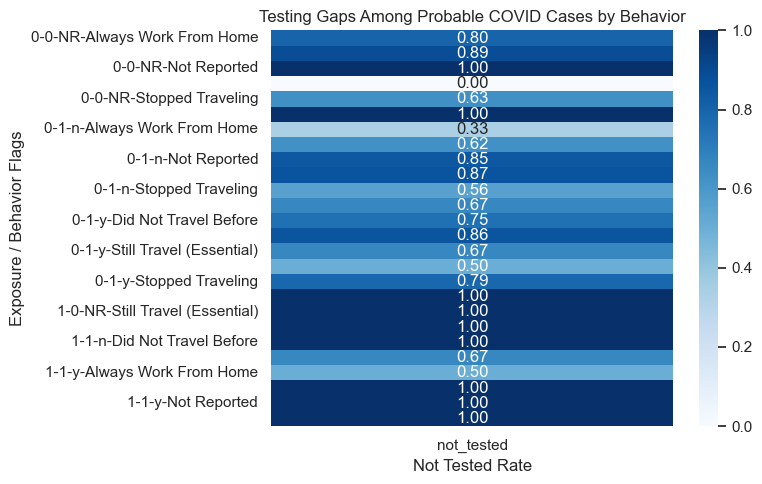

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.heatmap(
    heatmap_df.set_index(group_flags),
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Testing Gaps Among Probable COVID Cases by Behavior")
plt.xlabel("Not Tested Rate")
plt.ylabel("Exposure / Behavior Flags")
plt.tight_layout()
plt.show()



<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
If certain groups (e.g., exposed households, older adults, medically vulnerable) are under-tested, programs should focus on reducing access barriers and improving testing outreach.</em></strong></p>

<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>Q28. Should individuals over 60 be prioritized differently for intervention?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: Age is a strong risk factor for complications; comparing vulnerability and probable outcomes by age confirms whether age-based prioritization is justified.
</p>


In [93]:
# Calculate rates by age group
age_df = pd.DataFrame({
    "Age_Group": ["Over 60", "Under 60"],
    "Probable_COVID_Rate": [
        df[df["over_60"] == 1]["probable"].mean(),
        df[df["over_60"] == 0]["probable"].mean()
    ],
    "Vulnerable_Rate": [
        df[df["over_60"] == 1]["vulnerable"].mean(),
        df[df["over_60"] == 0]["vulnerable"].mean()
    ]
})

# Round to 2 decimals
age_df[["Probable_COVID_Rate", "Vulnerable_Rate"]] = (
    age_df[["Probable_COVID_Rate", "Vulnerable_Rate"]].round(2)
)

age_df

Age_Group  Probable_COVID_Rate  Vulnerable_Rate
0   Over 60                 0.04             1.00
1  Under 60                 0.05             0.14

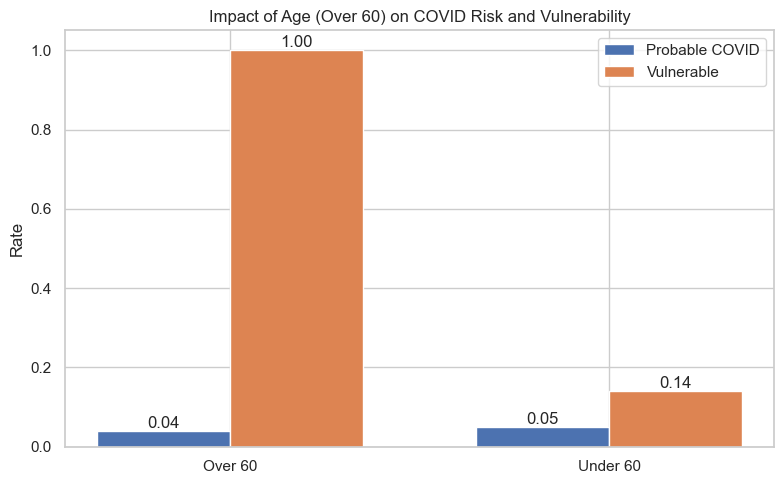

In [94]:
#Q6: Should individuals over 60 be prioritized differently for intervention?
import matplotlib.pyplot as plt
import numpy as np

labels = age_df["Age_Group"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, age_df["Probable_COVID_Rate"], width, label="Probable COVID")
plt.bar(x + width/2, age_df["Vulnerable_Rate"], width, label="Vulnerable")

plt.xticks(x, labels)
plt.ylabel("Rate")
plt.title("Impact of Age (Over 60) on COVID Risk and Vulnerability")
plt.legend()

# Add value labels
for i in range(len(labels)):
    plt.text(x[i] - width/2, age_df["Probable_COVID_Rate"][i],
             f'{age_df["Probable_COVID_Rate"][i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, age_df["Vulnerable_Rate"][i],
             f'{age_df["Vulnerable_Rate"][i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
If over-60 respondents have higher vulnerability (and/or probable rates), they should receive priority testing access, earlier follow-up, and stronger preventive messaging.</em></strong></p>

<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>29. Which medical conditions are most associated with vulnerability status?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: Vulnerability captures risk of severe outcomes; conditions most linked to vulnerability help identify who needs stronger protection and proactive monitoring.
</p>


In [95]:
exclude_cols = {
    "week", "fsa", "probable", "tested", "not_tested",
    "vulnerable", "over_60", "is_most_recent"
}

condition_cols = [
    c for c in df.columns
    if c not in exclude_cols
    and df[c].dropna().isin([0, 1]).all()
]

condition_cols


['fever_chills_shakes',
 'cough',
 'shortness_of_breath',
 'any_medical_conditions',
 'travel_outside_canada',
 'contact_with_illness']

In [96]:
rows = []

for col in condition_cols:
    vuln_rate = df[df["vulnerable"] == 1][col].mean()
    non_vuln_rate = df[df["vulnerable"] == 0][col].mean()
    
    rows.append({
        "condition": col.replace("_", " ").title(),
        "vulnerable_rate": vuln_rate,
        "non_vulnerable_rate": non_vuln_rate,
        "rate_diff": vuln_rate - non_vuln_rate
    })

assoc_df = pd.DataFrame(rows).dropna()
assoc_df.sort_values("rate_diff", ascending=False).head(10)


condition  vulnerable_rate  non_vulnerable_rate  rate_diff
3  Any Medical Conditions         0.675824             0.106775   0.569049
4   Travel Outside Canada         0.058977             0.026768   0.032209
2     Shortness Of Breath         0.036096             0.015885   0.020210
5    Contact With Illness         0.030525             0.021779   0.008746
0     Fever Chills Shakes         0.018722             0.012679   0.006043
1                   Cough         0.038805             0.033312   0.005493

In [97]:
plot_df = assoc_df.copy()
plot_df["bubble_size"] = plot_df["rate_diff"].abs() * 2000  # scale factor


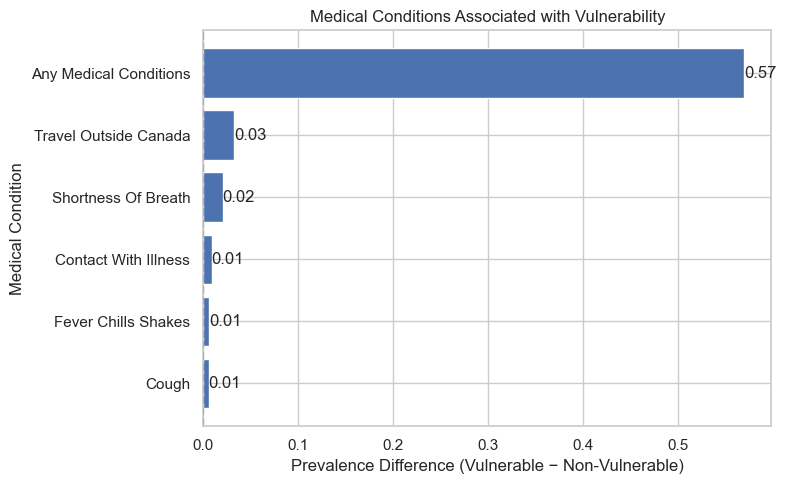

In [98]:
import matplotlib.pyplot as plt

plot_df = assoc_df.sort_values("rate_diff")

plt.figure(figsize=(8,5))
plt.barh(
    plot_df["condition"],
    plot_df["rate_diff"]
)

plt.axvline(0, linestyle="--", color="black")

plt.xlabel("Prevalence Difference (Vulnerable − Non-Vulnerable)")
plt.ylabel("Medical Condition")
plt.title("Medical Conditions Associated with Vulnerability")

# Value labels
for i, v in enumerate(plot_df["rate_diff"]):
    plt.text(
        v,
        i,
        f"{v:.2f}",
        va="center",
        ha="left" if v >= 0 else "right"
    )

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Having any pre-existing medical condition is the dominant driver of vulnerability, showing a much higher prevalence among vulnerable individuals than all other factors combined. Symptoms and exposure factors (cough, fever, shortness of breath, travel, contact) contribute only marginally to vulnerability classification.This indicates that vulnerability is primarily determined by underlying health conditions, not acute COVID symptoms or recent exposure.</p>



<p style="font-family: Cambria; font-size: 18px;"><i>
    <strong>30. Does contact with illness or household exposure significantly increase probable cases?
<br><b style="font-family: Cambria; font-size: 16px;"><i> Reasoning: Exposure is a major driver of infection risk; comparing probable rates between exposed vs non-exposed groups validates whether contact variables are strong predictors.
</p>

In [104]:
[c for c in df.columns if "house" in c.lower() or "contact" in c.lower()]


['contact_with_illness', 'contact_in_household']

In [105]:
exposure_cols = {
    "Contact with Illness": "contact_with_illness"
}

# add household exposure ONLY if it exists
if "household_exposure" in df.columns:
    exposure_cols["Household Exposure"] = "household_exposure"


In [106]:
rows = []

for label, col in exposure_cols.items():
    exposed_rate = df[df[col] == 1]["probable"].mean()
    not_exposed_rate = df[df[col] == 0]["probable"].mean()

    rows.append({
        "Exposure": label,
        "Exposed": exposed_rate,
        "Not Exposed": not_exposed_rate,
        "Difference": exposed_rate - not_exposed_rate
    })

exposure_df = pd.DataFrame(rows)
exposure_df


Exposure  Exposed  Not Exposed  Difference
0  Contact with Illness      1.0     0.020787    0.979213

In [107]:
for col in exposure_cols.values():
    print(col)
    print(df[col].value_counts(dropna=False))
    print()


contact_with_illness
contact_with_illness
0    287012
1      7093
Name: count, dtype: int64



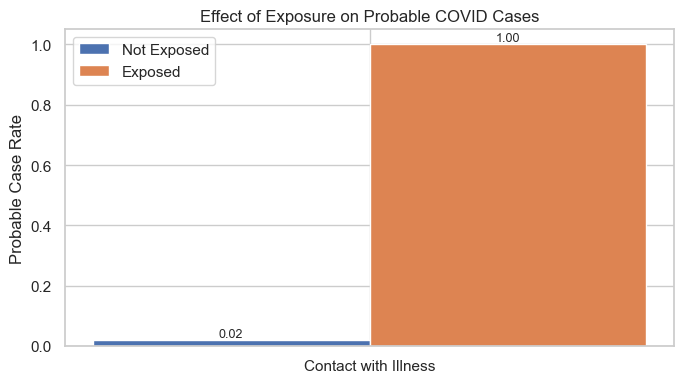

In [108]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(exposure_df))
width = 0.35

plt.figure(figsize=(7,4))

plt.bar(
    x - width/2,
    exposure_df["Not Exposed"],
    width,
    label="Not Exposed"
)

plt.bar(
    x + width/2,
    exposure_df["Exposed"],
    width,
    label="Exposed"
)

plt.xticks(x, exposure_df["Exposure"])
plt.ylabel("Probable Case Rate")
plt.title("Effect of Exposure on Probable COVID Cases")
plt.legend()

# Value labels
for i, r in exposure_df.iterrows():
    plt.text(i - width/2, r["Not Exposed"], f"{r['Not Exposed']:.2f}",
             ha="center", va="bottom", fontsize=9)
    plt.text(i + width/2, r["Exposed"], f"{r['Exposed']:.2f}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
If exposure groups show higher probable rates, public health teams should prioritize contact-based testing and quarantine guidance, especially for household contacts.</em></strong></p>